In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [37]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [38]:
catalog.layers

defaultdict(set,
            {'raw': {'hado_17',
              'hado_18',
              'hado_19',
              'hado_20',
              'hado_21',
              'hado_22'},
             'raw_preprocessing': {'hado_concat'},
             'raw_processing': {'hado_clean'},
             'intermediate_processing': {'hado_clean_na',
              'hado_replaced_words'},
             'final_processing': {'hado_cleaned'},
             'intermediate': {'hado_values'}})

In [39]:
df = catalog.load('hado_cleaned')

[08/02/23 20:03:41] INFO     Loading data from 'hado_cleaned' (CSVDataSet)...                   data_catalog.py:345

Preview the dataset


In [40]:
df.shape

(4013, 37)

In [41]:
df.head()

h_procedencia s_procedencia  ap otros                  diagnostico  \
0   gil casares          upal  no    no                   cancer orl   
1       clinico     oncologia  no    no              melanoma vulvar   
2       clinico           mir  no    no          cancer broncogenico   
3       clinico     digestivo  no    no            cirrosis hepatica   
4       clinico     urgencias  no    no  neplasia de mama estadio IV   

                  motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0           control sintomas                si                   si     no   
1          mal control dolor                si                   no     no   
2          control evolutivo                si                   si     no   
3  administracion octreotido                no                   no     no   
4           control sintomas                si                   no     no   

  disnea  ... ast_anorx agudo_estable cronico_reag trato_antibiotico  \
0     no  ...        si         vacio        vacio             vacio   
1     no  ...        si         vacio        vacio             vacio   
2     si  ...        no         vacio        vacio             vacio   
3     no  ...        no         vacio        vacio             vacio   
4     si  ...        no         vacio        vacio             vacio   

  transfusion paracentesis toracocentesis ayuntamiento fecha_alta  fe_iv  
0       vacio        vacio          vacio  desconocido    unknown  vacio  
1       vacio        vacio          vacio  desconocido    unknown  vacio  
2       vacio        vacio          vacio  desconocido    unknown  vacio  
3       vacio        vacio          vacio  desconocido    unknown  vacio  
4       vacio        vacio          vacio  desconocido    unknown  vacio  

[5 rows x 37 columns]

View summary of dataset 📃

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   h_procedencia         4013 non-null   object
 1   s_procedencia         4013 non-null   object
 2   ap                    4013 non-null   object
 3   otros                 4013 non-null   object
 4   diagnostico           4013 non-null   object
 5   motivo_ing            4013 non-null   object
 6   paliativo_onc_noc     4013 non-null   object
 7   paliativo_no_onc_noc  4013 non-null   object
 8   fiebre                4013 non-null   object
 9   disnea                4013 non-null   object
 10  dolor                 4013 non-null   object
 11  delirium              4013 non-null   object
 12  otros_1               4013 non-null   object
 13  p_terminal            4013 non-null   object
 14  agonia                4013 non-null   object
 15  ps_ecog               4013 non-null   

In [43]:
df.describe().T

count         mean        std     min     25%     50%     75%  \
n_estancias  4013.0    14.981560  19.471153     0.0     4.0     9.0    18.0   
n_visitas    4013.0     6.008472   6.959248     0.0     2.0     4.0     7.0   
year         4013.0  2019.904062   1.786321  2017.0  2018.0  2020.0  2022.0   

                max  
n_estancias   304.0  
n_visitas      99.0  
year         2022.0

In [44]:
df.describe(include=['object']).T

count unique                                  top  freq
h_procedencia         4013     16                              clinico  2240
s_procedencia         4013    100                                   no  1225
ap                    4013      8                                   no  2767
otros                 4013     41                                   no  3866
diagnostico           4013   1519  ITU (infeccion del tracto urinario)   172
motivo_ing            4013    560                     control sintomas  1229
paliativo_onc_noc     4013      4                                   no  2487
paliativo_no_onc_noc  4013      4                                   no  2888
fiebre                4013      4                                   no  3480
disnea                4013      3                                   no  2824
dolor                 4013      2                                   no  2559
delirium              4013      3                                   no  3351
otros_1               4013    162                                   no  3663
p_terminal            4013      3                                vacio  2466
agonia                4013      3                                   no  2450
ps_ecog               4013     15                                   no  2032
barthel               4013     42                                   20  1008
gds_fast              4013     21                                   no  3170
eva_ing               4013     14                          desconocido  2465
otros_2               4013     52                          desconocido  2465
otros_complicaciones  4013    372                                   no  3431
sedacion              4013     26                                   no  3320
motivo_alta           4013     91                         fin cuidados  1336
medico                4013     14                     fernandez benito   797
ast_anorx             4013      2                                   no  2453
agudo_estable         4013      3                                   no  2030
cronico_reag          4013      4                                vacio  1550
trato_antibiotico     4013      3                                vacio  1550
transfusion           4013      4                                   no  2400
paracentesis          4013      3                                   no  2392
toracocentesis        4013      3                                   no  2458
ayuntamiento          4013     34                          desconocido  1551
fecha_alta            4013    213                              unknown  3253
fe_iv                 4013      3                                vacio  2959

Checking Nans in the Dataset:

In [45]:
df.isnull().sum()

h_procedencia           0
s_procedencia           0
ap                      0
otros                   0
diagnostico             0
motivo_ing              0
paliativo_onc_noc       0
paliativo_no_onc_noc    0
fiebre                  0
disnea                  0
dolor                   0
delirium                0
otros_1                 0
p_terminal              0
agonia                  0
ps_ecog                 0
barthel                 0
gds_fast                0
eva_ing                 0
otros_2                 0
otros_complicaciones    0
n_estancias             0
n_visitas               0
sedacion                0
motivo_alta             0
medico                  0
year                    0
ast_anorx               0
agudo_estable           0
cronico_reag            0
trato_antibiotico       0
transfusion             0
paracentesis            0
toracocentesis          0
ayuntamiento            0
fecha_alta              0
fe_iv                   0
dtype: int64

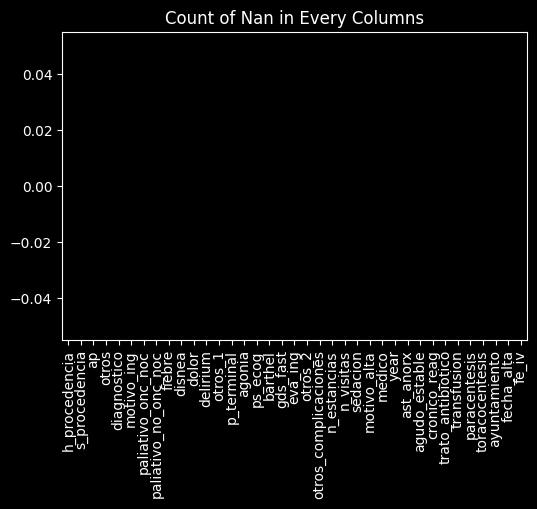

In [46]:
plt.figure(figsize=(6,4))
plt.title('Count of Nan in Every Columns')
df.isnull().sum().plot(kind='bar', color = "blue");

In [47]:
round(df.isnull().sum()/len(df)*100,2)

h_procedencia           0.0
s_procedencia           0.0
ap                      0.0
otros                   0.0
diagnostico             0.0
motivo_ing              0.0
paliativo_onc_noc       0.0
paliativo_no_onc_noc    0.0
fiebre                  0.0
disnea                  0.0
dolor                   0.0
delirium                0.0
otros_1                 0.0
p_terminal              0.0
agonia                  0.0
ps_ecog                 0.0
barthel                 0.0
gds_fast                0.0
eva_ing                 0.0
otros_2                 0.0
otros_complicaciones    0.0
n_estancias             0.0
n_visitas               0.0
sedacion                0.0
motivo_alta             0.0
medico                  0.0
year                    0.0
ast_anorx               0.0
agudo_estable           0.0
cronico_reag            0.0
trato_antibiotico       0.0
transfusion             0.0
paracentesis            0.0
toracocentesis          0.0
ayuntamiento            0.0
fecha_alta          

First we Analyze Numerical Data

In [48]:
num_data = df.select_dtypes(exclude=['object']).copy()
num_data.head()

n_estancias  n_visitas  year
0           21         10  2017
1           24          8  2017
2           14          6  2017
3            1          1  2017
4            2          1  2017

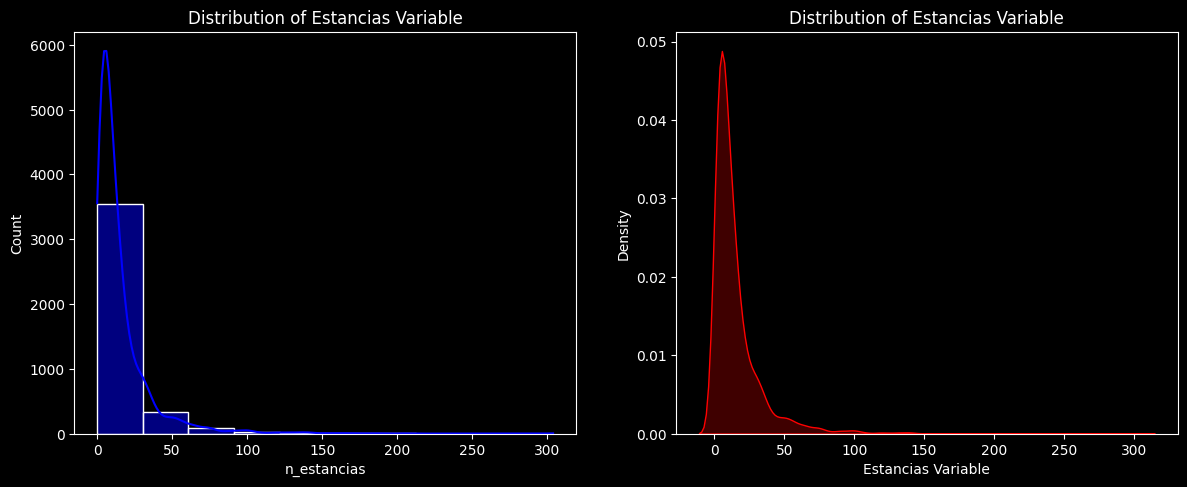

In [91]:
plt.figure(figsize=(22,24))
temp = num_data['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10, color= "blue", kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

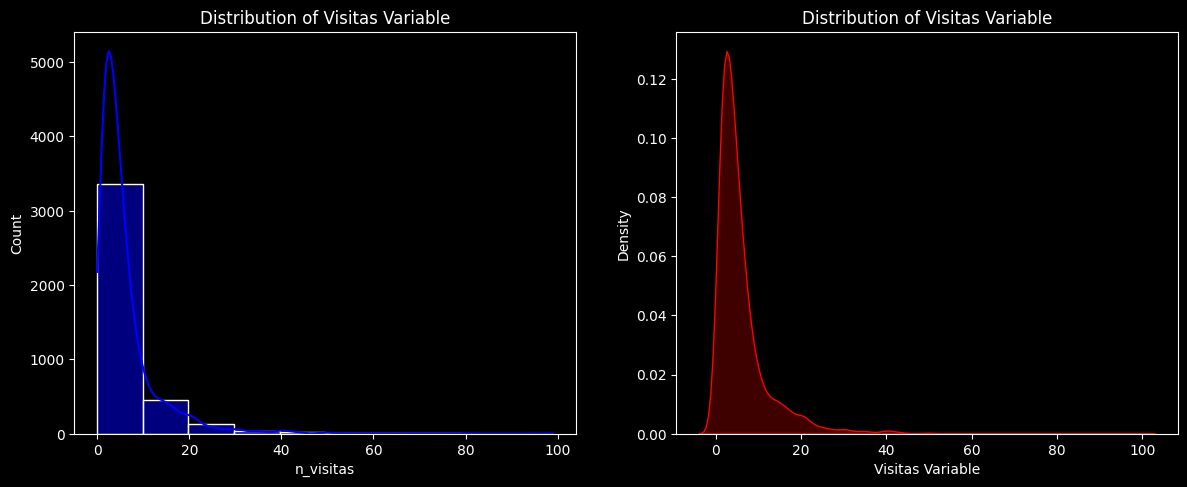

In [90]:
plt.figure(figsize=(22,24))
temp = num_data['n_visitas']
x = pd.Series(temp,name='Visitas Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Visitas Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Visitas Variable')
plt.show()

Detect Outliers

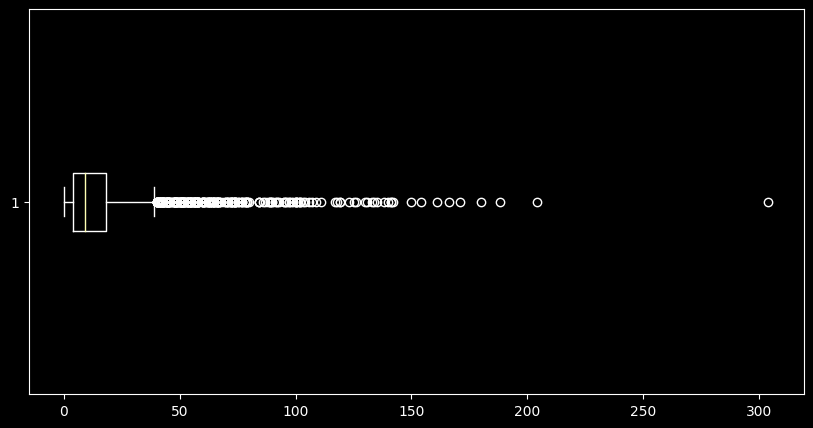

In [93]:
plt.figure(figsize=(10, 5))
plt.boxplot(num_data['n_estancias'],vert=False)
plt.show()

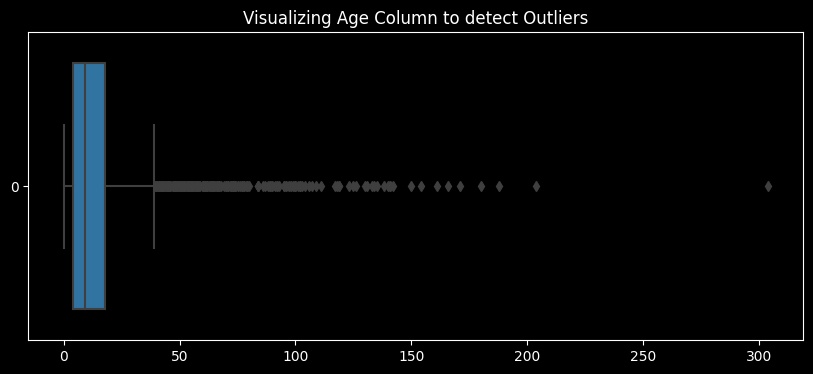

In [95]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(num_data['n_estancias'],color= "tab:blue", orient="h")
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

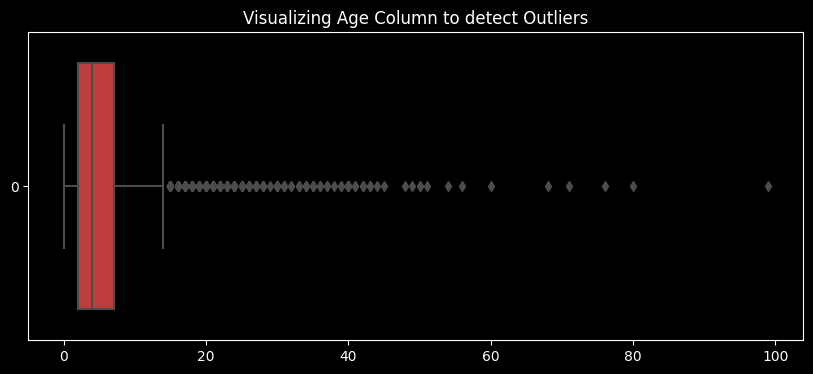

In [96]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(num_data['n_visitas'],color= "tab:red", orient="h")
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

Deteccion de outliers con quantile

In [150]:
Q1 = num_data['n_estancias'].quantile(0.25)
print("Primer Cuartil", Q1,"\n")

Q3 = num_data['n_estancias'].quantile(0.75)
print("Tercer Cuartil", Q3,"\n")

IQR = Q3 -Q1
print("Rango Intercuartil", IQR,"\n")

Mediana = num_data['n_estancias'].median()
print("Mediana", Mediana,"\n")

Valor_min = num_data['n_estancias'].min()
print("Valor mínimo", Valor_min,"\n")

Valor_max = num_data['n_estancias'].max()
print("Valor máximo", Valor_max,"\n")


Primer Cuartil 4.0 

Tercer Cuartil 18.0 

Rango Intercuartil 14.0 

Mediana 9.0 

Valor mínimo 0 

Valor máximo 304 



In [151]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 -17.0
BS_Calculado 
 39.0


Ubicación Outliers

In [152]:
ubicacion_outliers = (num_data['n_estancias'] < BI_Calculado) | (num_data['n_estancias'] > BS_Calculado)
print(f"\n Ubicación de Outliers \n{ubicacion_outliers}")


 Ubicación de Outliers 
0       False
1       False
2       False
3       False
4       False
        ...  
4008    False
4009    False
4010    False
4011    False
4012    False
Name: n_estancias, Length: 4013, dtype: bool


In [153]:
outliers = num_data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
       n_estancias  n_visitas  year
21            103         21  2017
24             69         31  2017
58             92         40  2017
61             49         14  2017
106            98         35  2017
...           ...        ...   ...
3920           65         50  2022
3936           79         39  2022
3937           60         24  2022
3949           42         16  2022
3993          171         37  2022

[294 rows x 3 columns]


In [154]:
outliers_ordenados = outliers.sort_values("n_estancias")
outliers_ordenados

n_estancias  n_visitas  year
2464           40          6  2021
559            40         14  2017
373            40         16  2017
3436           40         30  2022
331            40         14  2017
...           ...        ...   ...
3993          171         37  2022
789           180         40  2018
3301          188         39  2022
1972          204         51  2020
735           304         60  2018

[294 rows x 3 columns]

In [155]:
ubicacion_sin_out = (num_data['n_estancias'] >= BI_Calculado) & (num_data['n_estancias'] <= BS_Calculado)
sin_out = num_data[ubicacion_sin_out]
sin_out

n_estancias  n_visitas  year
0              21         10  2017
1              24          8  2017
2              14          6  2017
3               1          1  2017
4               2          1  2017
...           ...        ...   ...
4008           15          7  2022
4009            6          4  2022
4010           21          7  2022
4011           11          3  2022
4012           11          6  2022

[3719 rows x 3 columns]

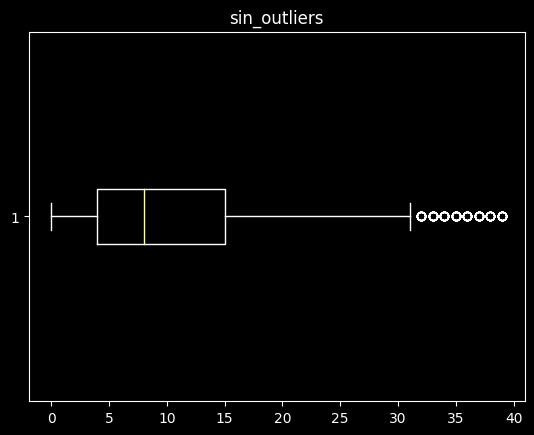

In [156]:
plt.title("sin_outliers")
plt.boxplot(sin_out["n_estancias"], vert=False)
plt.show();

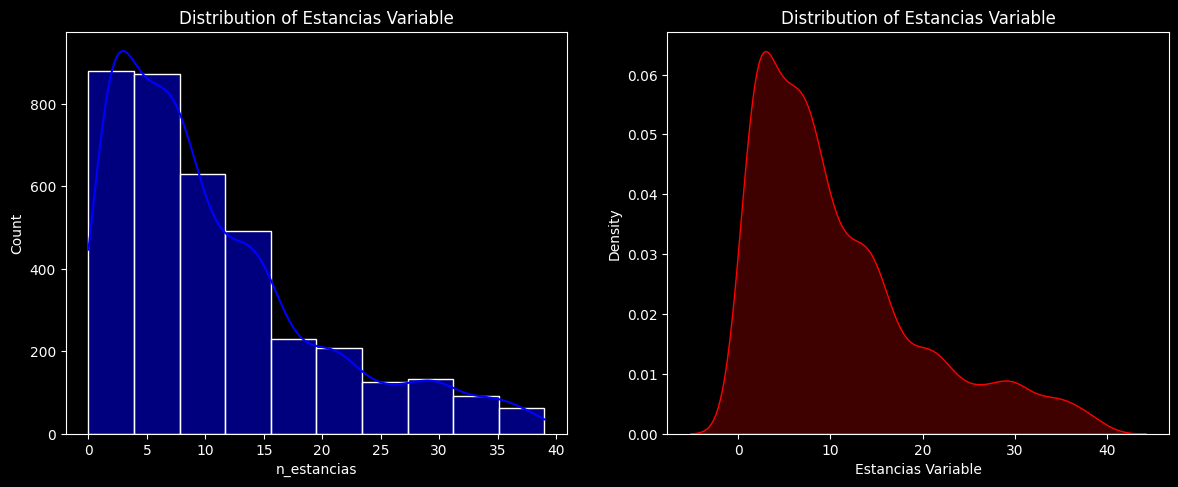

In [159]:
plt.figure(figsize=(22,24))
temp = sin_out['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

Repetir proceso hasta que no queden outliers

In [145]:
Q1 = num_data['n_visitas'].quantile(0.25)
print("Primer Cuartil", Q1,"\n")

Q3 = num_data['n_visitas'].quantile(0.75)
print("Tercer Cuartil", Q3,"\n")

IQR = Q3 -Q1
print("Rango Intercuartil", IQR,"\n")

Mediana = num_data['n_visitas'].median()
print("Mediana", Mediana,"\n")

Valor_min = num_data['n_visitas'].min()
print("Valor mínimo", Valor_min,"\n")

Valor_max = num_data['n_visitas'].max()
print("Valor máximo", Valor_max,"\n")


Primer Cuartil 2.0 

Tercer Cuartil 7.0 

Rango Intercuartil 5.0 

Mediana 4.0 

Valor mínimo 0 

Valor máximo 99 



In [146]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 -5.5
BS_Calculado 
 14.5


In [147]:
ubicacion_outliers = (num_data['n_visitas'] < BI_Calculado) | (num_data['n_visitas'] > BS_Calculado)
print("\n Ubicación de Outliers \n", ubicacion_outliers)


 Ubicación de Outliers 
 0       False
1       False
2       False
3       False
4       False
        ...  
4008    False
4009    False
4010    False
4011    False
4012    False
Name: n_visitas, Length: 4013, dtype: bool


In [149]:
outliers = num_data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
       n_estancias  n_visitas  year
21            103         21  2017
24             69         31  2017
26             33         15  2017
58             92         40  2017
69             35         18  2017
...           ...        ...   ...
3936           79         39  2022
3937           60         24  2022
3949           42         16  2022
3993          171         37  2022
3995           29         16  2022

[355 rows x 3 columns]


In [ ]:
outliers_ordenados = outliers.sort_values("n_visitas")
outliers_ordenados

Outliers con log

In [171]:
num_data_log = num_data.copy()
num_data_log

n_estancias  n_visitas  year
0              21         10  2017
1              24          8  2017
2              14          6  2017
3               1          1  2017
4               2          1  2017
...           ...        ...   ...
4008           15          7  2022
4009            6          4  2022
4010           21          7  2022
4011           11          3  2022
4012           11          6  2022

[4013 rows x 3 columns]

In [172]:
import numpy as np

# Asumiendo que df es tu DataFrame y 'columna' es la que quieres transformar
num_data_log['n_estancias'] = np.log(num_data_log['n_estancias'])
num_data_log['n_visitas'] = np.log(num_data_log['n_visitas'])
num_data_log


[08/02/23 21:23:40] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\pandas\core\arraylik                
                             e.py:402: RuntimeWarning: divide by zero encountered in log                           
                               result = getattr(ufunc, method)(*inputs, **kwargs)                                  
                                                                                                                   

n_estancias  n_visitas  year
0        3.044522   2.302585  2017
1        3.178054   2.079442  2017
2        2.639057   1.791759  2017
3        0.000000   0.000000  2017
4        0.693147   0.000000  2017
...           ...        ...   ...
4008     2.708050   1.945910  2022
4009     1.791759   1.386294  2022
4010     3.044522   1.945910  2022
4011     2.397895   1.098612  2022
4012     2.397895   1.791759  2022

[4013 rows x 3 columns]

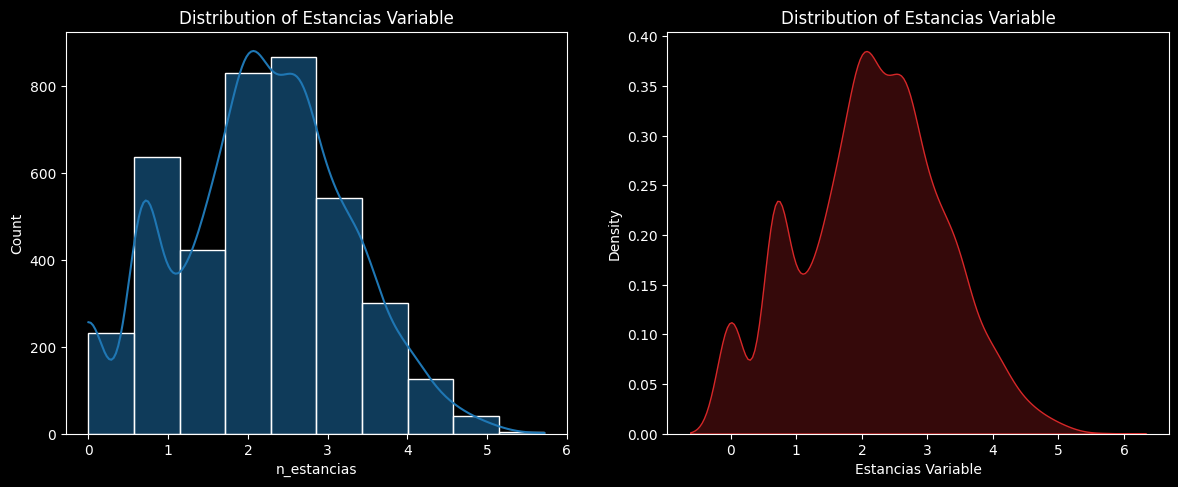

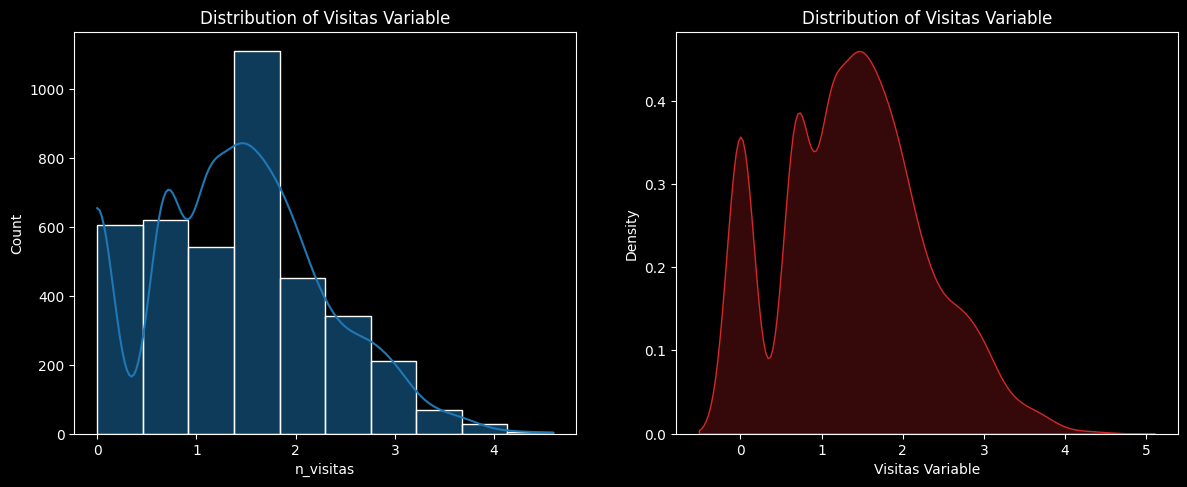

In [176]:
plt.figure(figsize=(22,24))
temp = num_data_log['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "tab:red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

plt.figure(figsize=(22,24))
temp = num_data_log['n_visitas']
x = pd.Series(temp,name='Visitas Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Visitas Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "tab:red")
ax.set_title('Distribution of Visitas Variable')
plt.show()

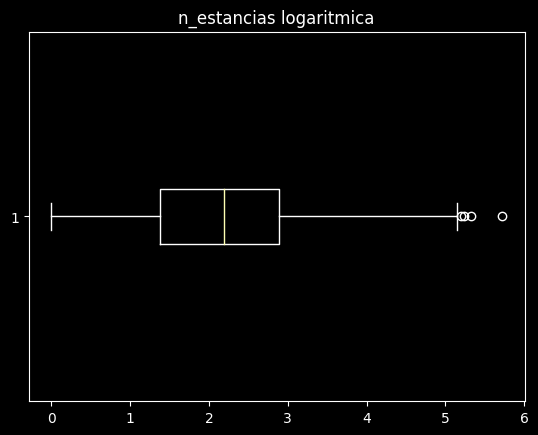

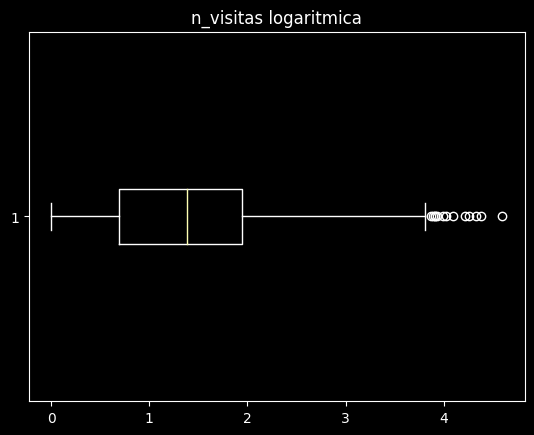

In [180]:
plt.title("n_estancias logaritmica")
plt.boxplot(num_data_log["n_estancias"], vert=False)
plt.show();
plt.title("n_visitas logaritmica")
plt.boxplot(num_data_log["n_visitas"], vert=False)
plt.show();

In [76]:
def unique_sorted_counts(df):
    for col in df:
        print(f"name column: {col}\n", df[col].value_counts(), "\n")
unique_sorted_counts(num_data)

name column: n_estancias
 2      455
7      269
1      231
5      231
8      226
      ... 
180      1
93       1
204      1
91       1
171      1
Name: n_estancias, Length: 128, dtype: int64 

name column: n_visitas
 2     619
1     607
3     542
4     474
5     368
6     269
7     213
8     153
10    104
9      86
12     60
14     51
11     45
15     43
20     40
13     39
16     37
17     35
18     30
0      28
22     20
21     18
19     13
30     12
24     10
25     10
40      9
23      9
27      7
26      6
28      6
31      5
35      4
34      4
33      3
36      3
43      3
42      3
41      2
32      2
39      2
37      2
50      2
56      1
51      1
29      1
60      1
48      1
54      1
71      1
76      1
49      1
68      1
38      1
45      1
99      1
80      1
44      1
Name: n_visitas, dtype: int64 

name column: year
 2022    1055
2021     765
2020     643
2017     587
2018     536
2019     427
Name: year, dtype: int64 



Now we Analyze Categorical Data

In [82]:
cat_data = df.select_dtypes(exclude=['int']).copy()
cat_data.head()

h_procedencia s_procedencia  ap otros                  diagnostico  \
0   gil casares          upal  no    no                   cancer orl   
1       clinico     oncologia  no    no              melanoma vulvar   
2       clinico           mir  no    no          cancer broncogenico   
3       clinico     digestivo  no    no            cirrosis hepatica   
4       clinico     urgencias  no    no  neplasia de mama estadio IV   

                  motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0           control sintomas                si                   si     no   
1          mal control dolor                si                   no     no   
2          control evolutivo                si                   si     no   
3  administracion octreotido                no                   no     no   
4           control sintomas                si                   no     no   

  disnea  ... ast_anorx agudo_estable cronico_reag trato_antibiotico  \
0     no  ...        si         vacio        vacio             vacio   
1     no  ...        si         vacio        vacio             vacio   
2     si  ...        no         vacio        vacio             vacio   
3     no  ...        no         vacio        vacio             vacio   
4     si  ...        no         vacio        vacio             vacio   

  transfusion paracentesis toracocentesis ayuntamiento fecha_alta  fe_iv  
0       vacio        vacio          vacio  desconocido    unknown  vacio  
1       vacio        vacio          vacio  desconocido    unknown  vacio  
2       vacio        vacio          vacio  desconocido    unknown  vacio  
3       vacio        vacio          vacio  desconocido    unknown  vacio  
4       vacio        vacio          vacio  desconocido    unknown  vacio  

[5 rows x 34 columns]

In [83]:
cat_data.isnull().sum()

h_procedencia           0
s_procedencia           0
ap                      0
otros                   0
diagnostico             0
motivo_ing              0
paliativo_onc_noc       0
paliativo_no_onc_noc    0
fiebre                  0
disnea                  0
dolor                   0
delirium                0
otros_1                 0
p_terminal              0
agonia                  0
ps_ecog                 0
barthel                 0
gds_fast                0
eva_ing                 0
otros_2                 0
otros_complicaciones    0
sedacion                0
motivo_alta             0
medico                  0
ast_anorx               0
agudo_estable           0
cronico_reag            0
trato_antibiotico       0
transfusion             0
paracentesis            0
toracocentesis          0
ayuntamiento            0
fecha_alta              0
fe_iv                   0
dtype: int64

In [84]:
# Frequency Distribution of the categorical column

cat_data.nunique()

h_procedencia             16
s_procedencia            100
ap                         8
otros                     41
diagnostico             1519
motivo_ing               560
paliativo_onc_noc          4
paliativo_no_onc_noc       4
fiebre                     4
disnea                     3
dolor                      2
delirium                   3
otros_1                  162
p_terminal                 3
agonia                     3
ps_ecog                   15
barthel                   42
gds_fast                  21
eva_ing                   14
otros_2                   52
otros_complicaciones     372
sedacion                  26
motivo_alta               91
medico                    14
ast_anorx                  2
agudo_estable              3
cronico_reag               4
trato_antibiotico          3
transfusion                4
paracentesis               3
toracocentesis             3
ayuntamiento              34
fecha_alta               213
fe_iv                      3
dtype: int64

# Notes:

* Dataset has 7 (0.2%) duplicate rows	Duplicates
  
* `s_procedencia` has a **high cardinality**: 100 distinct values	**High cardinality**
* `diagnostico` has a **high cardinality**: 1519 distinct values	**High cardinality**
* `motivo_ing` has a **high cardinality**: 563 distinct values	**High cardinality**
* `otros_1` has a **high cardinality**: 162 distinct values	**High cardinality**
* `otros_2` has a **high cardinality**: 52 distinct values	**High cardinality**
* `otros_complicaciones` has a **high cardinality**: 372 distinct values	**High cardinality**
* `motivo_alta` has a **high cardinality**: 91 distinct values	**High cardinality**
* `fecha_alta` has a **high cardinality**: 213 distinct values	**High cardinality**
* `n_estancias` is highly overall correlated with n_visitas	**High correlation**
* `n_visitas` is highly overall correlated with n_estancias	**High correlation**
* `paliativo_onc_noc` is highly overall correlated with paliativo_no_onc_noc and 1 other fields	**High correlation**
* `paliativo_no_onc_noc` is highly overall correlated with paliativo_onc_noc and 1 other fields	**High correlation**
* `p_terminal` is highly overall correlated with otros_2 and 7 other fields	**High correlation**
* `agonia` is highly overall correlated with fe_iv	**High correlation**
* `eva_ing` is highly overall correlated with agudo_estable and 7 other fields	**High correlation**
* `otros_2` is highly overall correlated with p_terminal and 6 other fields	**High correlation**
* `agudo_estable` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `cronico_reag` is highly overall correlated with paliativo_onc_noc and 10 other fields	**High correlation**
* `trato_antibiotico` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `transfusion` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `paracentesis` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `toracocentesis` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `ayuntamiento` is highly overall correlated with p_terminal and 7 other fields	**High correlation**
* `fe_iv` is highly overall correlated with agonia and 1 other fields	**High correlation**
* `h_procedencia` is highly **imbalance**d (61.0%)	**Imbalance**
* `ap` is highly **imbalance**d (69.3%)	**Imbalance**
* `otros` is highly **imbalance**d (93.1%)	**Imbalance**
* `paliativo_onc_noc` is highly **imbalance**d (51.8%)	**Imbalance**
* `paliativo_no_onc_noc` is highly **imbalance**d (56.8%)	**Imbalance**
* `fiebre` is highly **imbalance**d (71.4%)	**Imbalance**
* `delirium` is highly **imbalance**d (59.1%)	**Imbalance**
* `otros_1` is highly **imbalance**d (86.4%)	**Imbalance**
* `gds_fast` is highly **imbalance**d (68.1%)	**Imbalance**
* `eva_ing` is highly **imbalance**d (80.5%)	**Imbalance**
* `otros_2` is highly **imbalance**d (79.9%)	**Imbalance**
* `otros_complicaciones` is highly **imbalance**d (79.3%)	**Imbalance**
* `sedacion` is highly **imbalance**d (82.5%)	**Imbalance**
* `motivo_alta` is highly **imbalance**d (63.9%)	**Imbalance**
* `fecha_alta` is highly **imbalance**d (72.7%)	**Imbalance**
* `eva_ing has` 2465 (61.4%) missing values	Missing

In [27]:
# # Agrupar columnas otros en una sola
# df['otros'] = df[['otros_complicaciones', 'otros_2', 'otros_1', 'otros']].apply(
#     lambda row: ' '.join([str(val) for val in row if pd.notnull(val) and str(val)!='']), axis=1
# )

# # Si quieres eliminar las columnas originales después de combinarlas
# df = df.drop(columns=['otros_complicaciones', 'otros_2', 'otros_1'])

In [28]:
# df['otros'].unique()

# 1.Frecuency Analysis

In [85]:
for col in cat_data.columns:
    print(cat_data[col].value_counts())

clinico                 2240
no                      1251
conxo                    329
gil casares              157
provincial                12
chuac                      6
residencia                 5
si                         3
rosaleda                   3
hula                       1
salnes                     1
ap                         1
san rafael la coruna       1
quiron la coruna           1
lucus augusti              1
pontevedra                 1
Name: h_procedencia, dtype: int64
no                              1225
oncologia                        538
mir                              483
urgencias                        415
upal                             208
                                ... 
consultas externas oncologia       1
mir gil                            1
enfermedad infecciosas             1
respiratorio                       1
utab                               1
Name: s_procedencia, Length: 100, dtype: int64
no                  2767
si                  123

In [86]:
[(col, df[col].value_counts()) for col in df]

[('h_procedencia',
  clinico                 2240
  no                      1251
  conxo                    329
  gil casares              157
  provincial                12
  chuac                      6
  residencia                 5
  si                         3
  rosaleda                   3
  hula                       1
  salnes                     1
  ap                         1
  san rafael la coruna       1
  quiron la coruna           1
  lucus augusti              1
  pontevedra                 1
  Name: h_procedencia, dtype: int64),
 ('s_procedencia',
  no                              1225
  oncologia                        538
  mir                              483
  urgencias                        415
  upal                             208
                                  ... 
  consultas externas oncologia       1
  mir gil                            1
  enfermedad infecciosas             1
  respiratorio                       1
  utab                               1

In [87]:
for col in cat_data:
    print(round(cat_data[col].value_counts()/len(cat_data[col]),3))

clinico                 0.558
no                      0.312
conxo                   0.082
gil casares             0.039
provincial              0.003
chuac                   0.001
residencia              0.001
si                      0.001
rosaleda                0.001
hula                    0.000
salnes                  0.000
ap                      0.000
san rafael la coruna    0.000
quiron la coruna        0.000
lucus augusti           0.000
pontevedra              0.000
Name: h_procedencia, dtype: float64
no                              0.305
oncologia                       0.134
mir                             0.120
urgencias                       0.103
upal                            0.052
                                ...  
consultas externas oncologia    0.000
mir gil                         0.000
enfermedad infecciosas          0.000
respiratorio                    0.000
utab                            0.000
Name: s_procedencia, Length: 100, dtype: float64
no               

## 1.1Visualización de las frecuencias

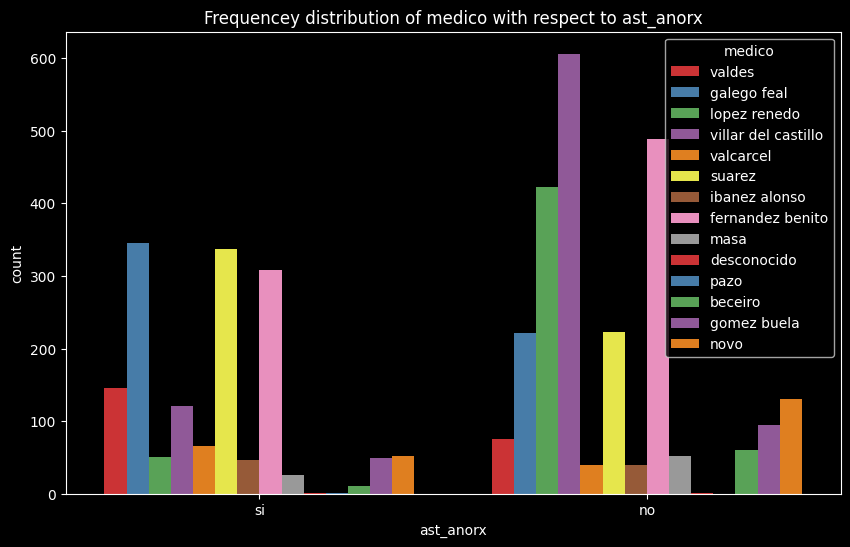

In [88]:
f , ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='ast_anorx',hue='medico',data=cat_data,palette='Set1')
ax.set_title('Frequencey distribution of medico with respect to ast_anorx')
plt.show()

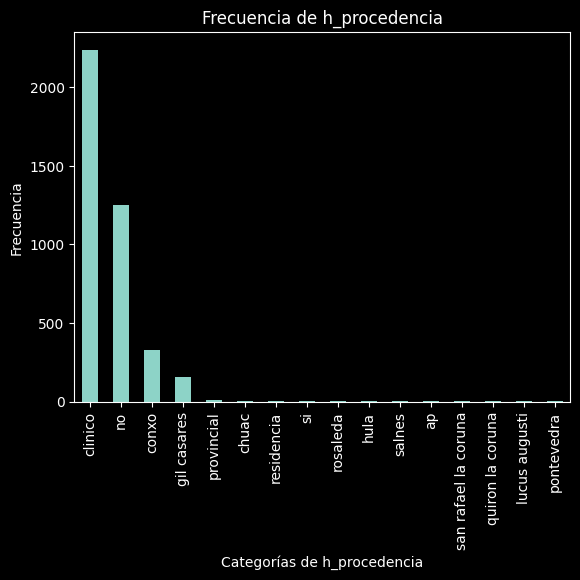

In [89]:
df['h_procedencia'].value_counts().plot(kind='bar')
plt.title('Frecuencia de h_procedencia')
plt.xlabel('Categorías de h_procedencia')
plt.ylabel('Frecuencia')
plt.show()

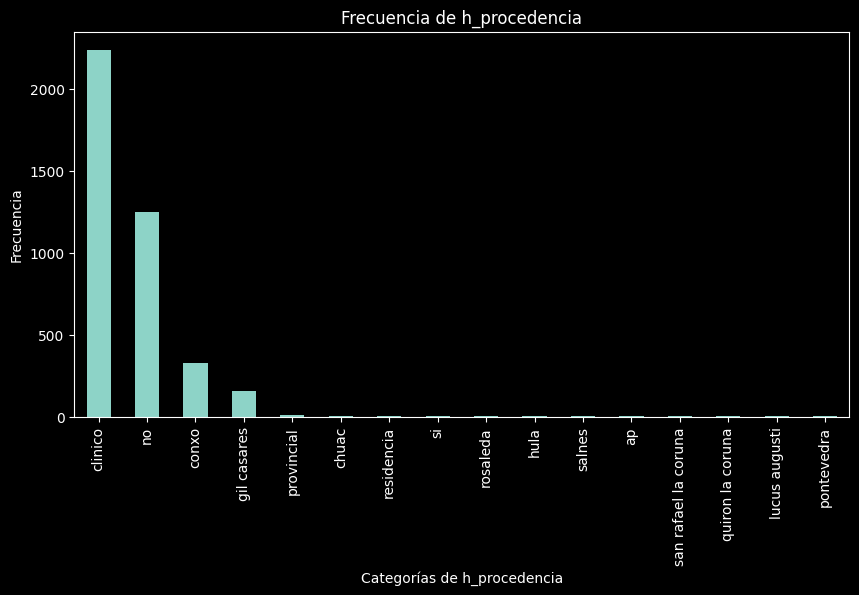

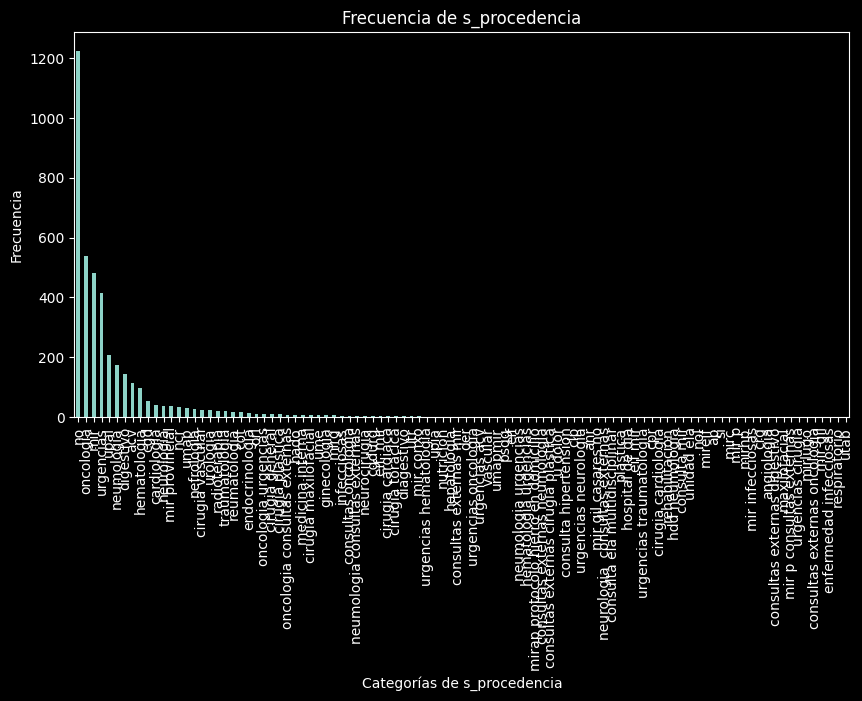

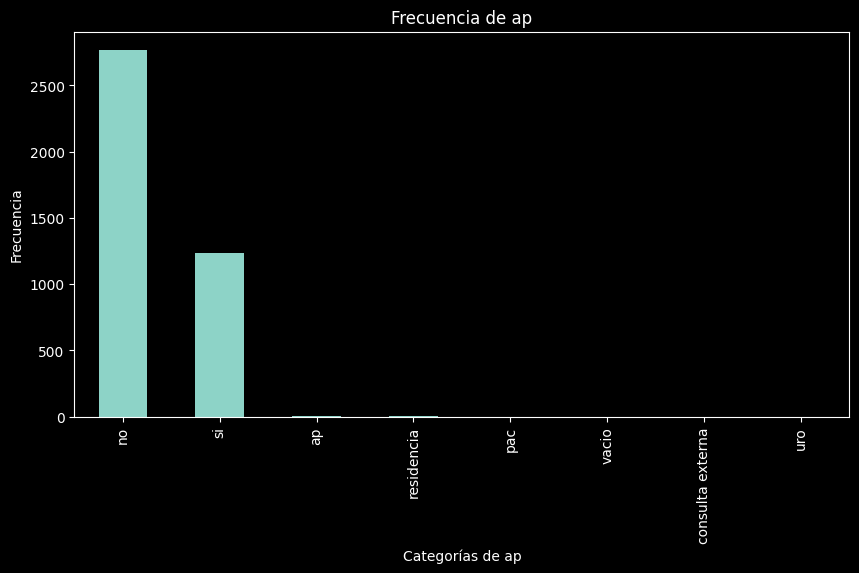

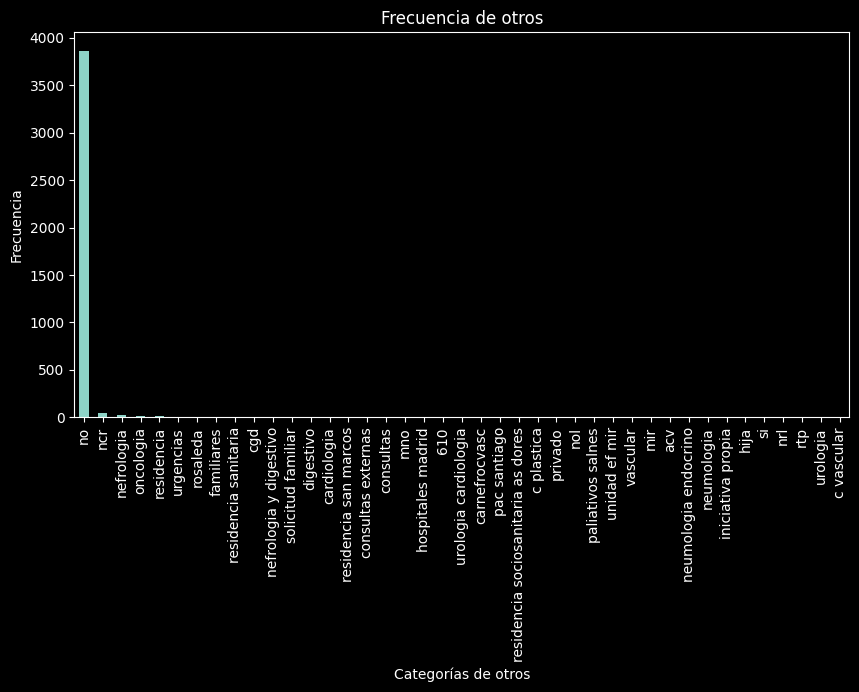

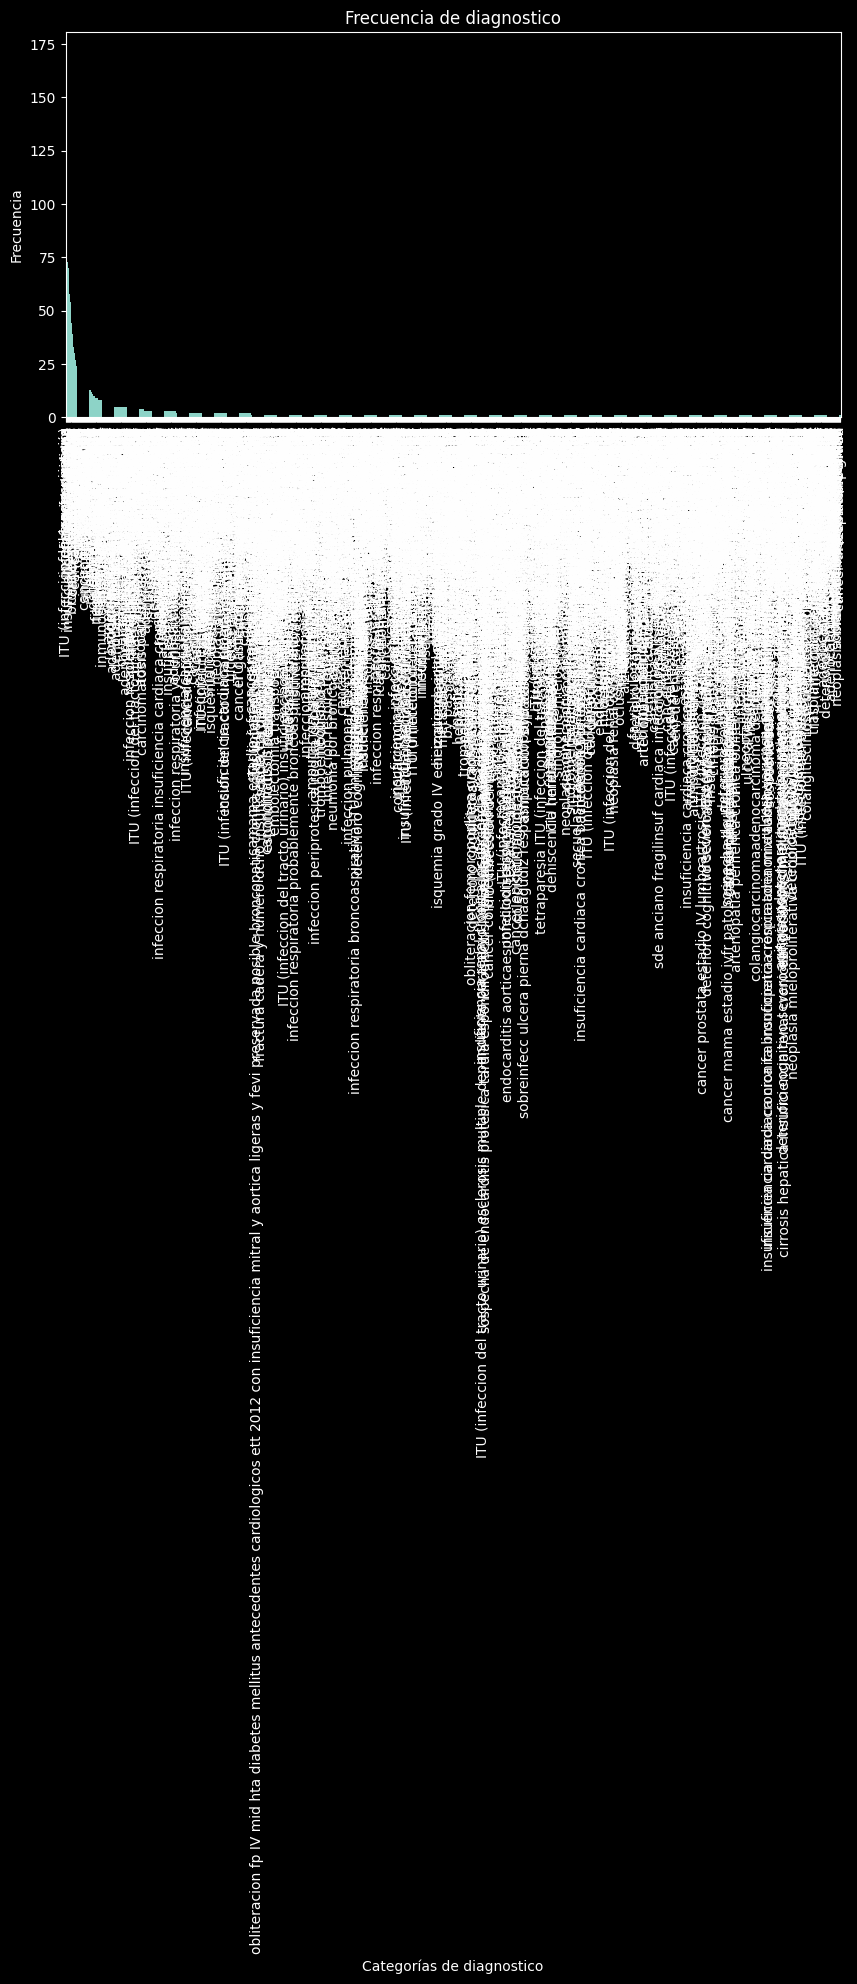

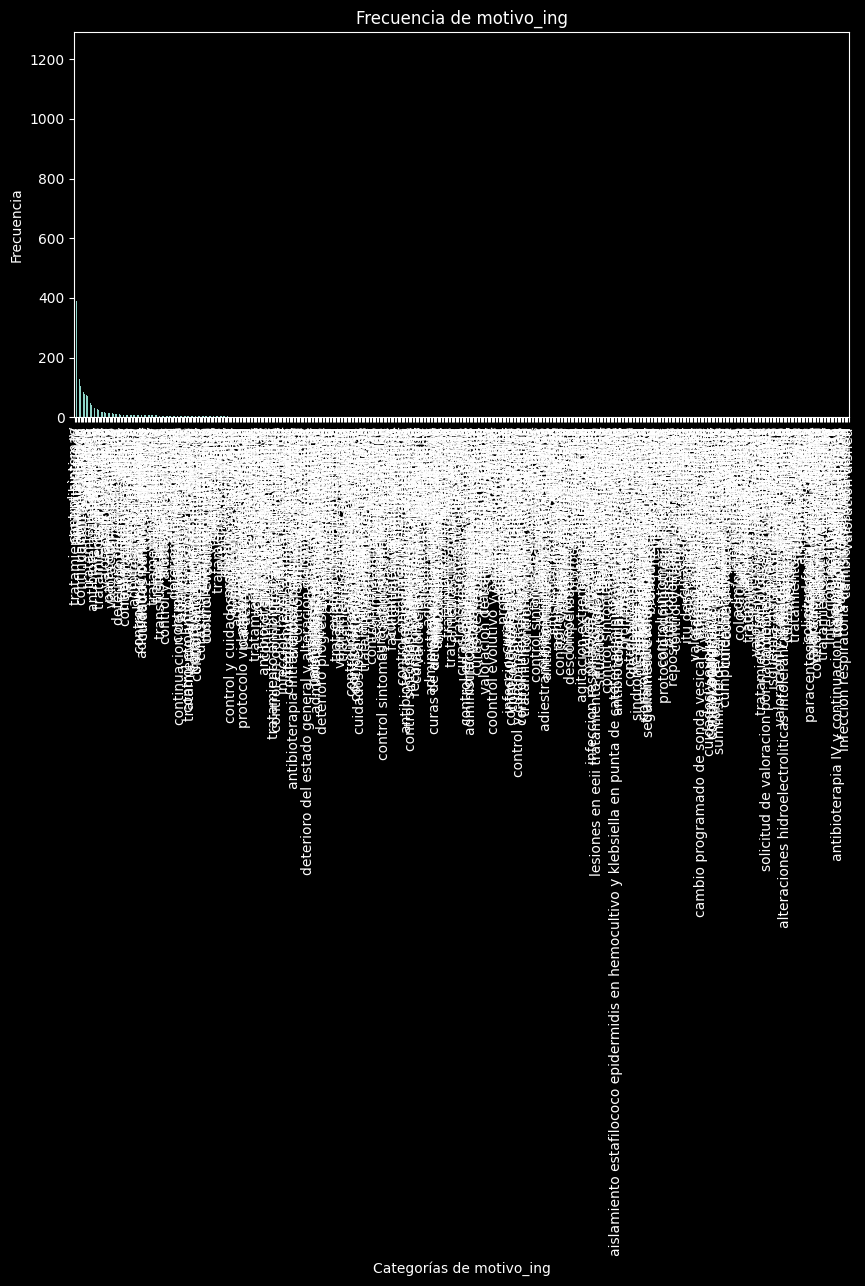

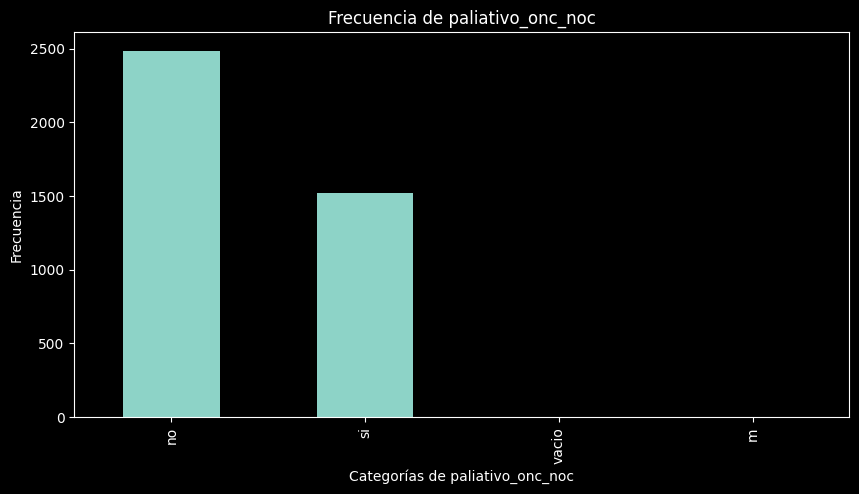

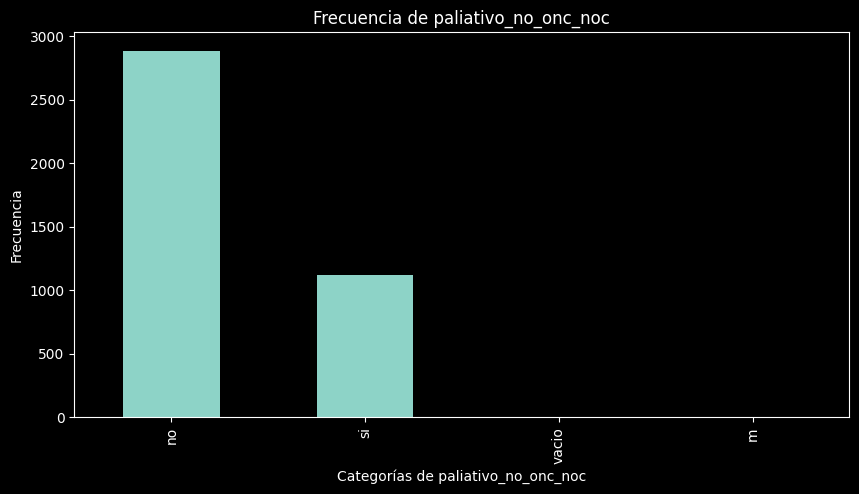

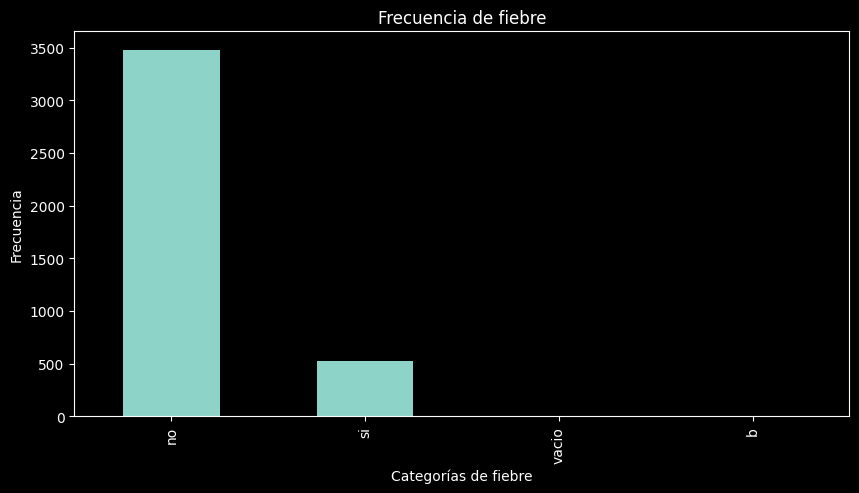

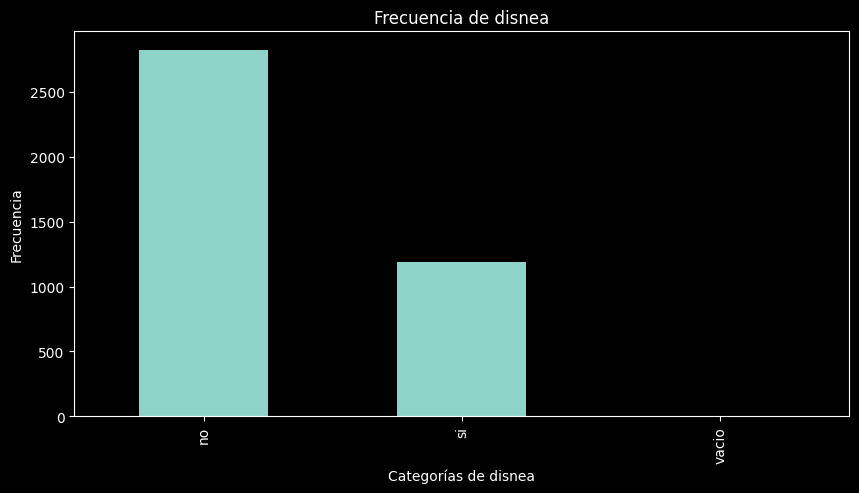

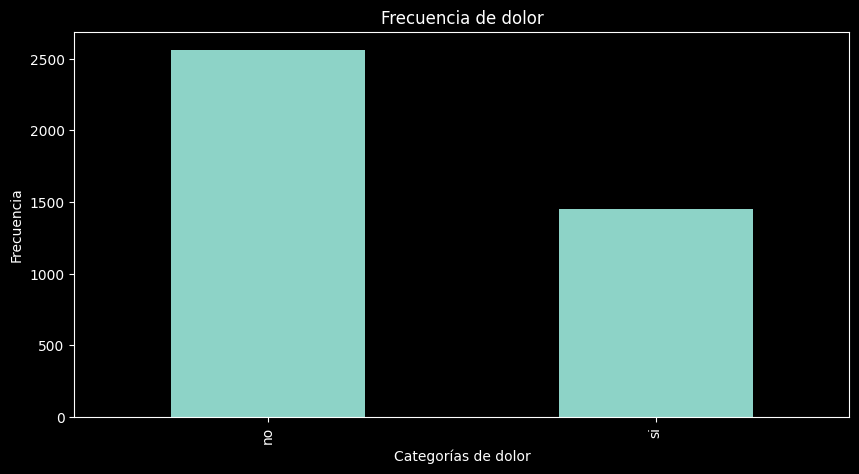

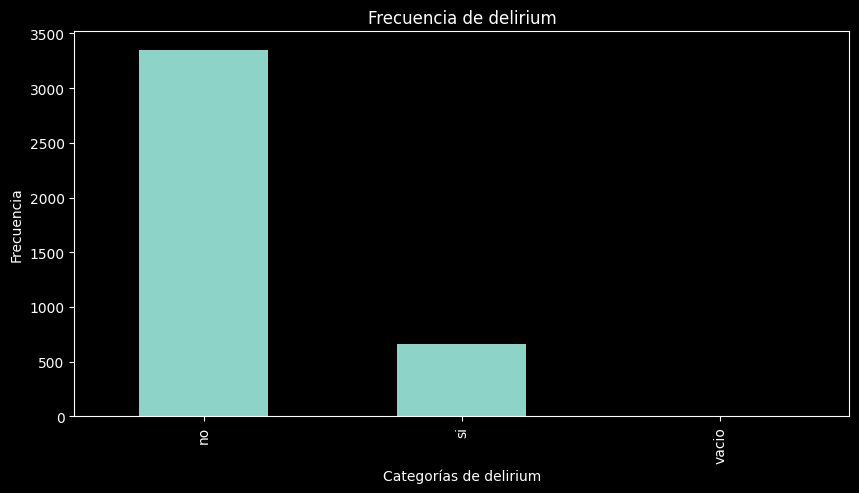

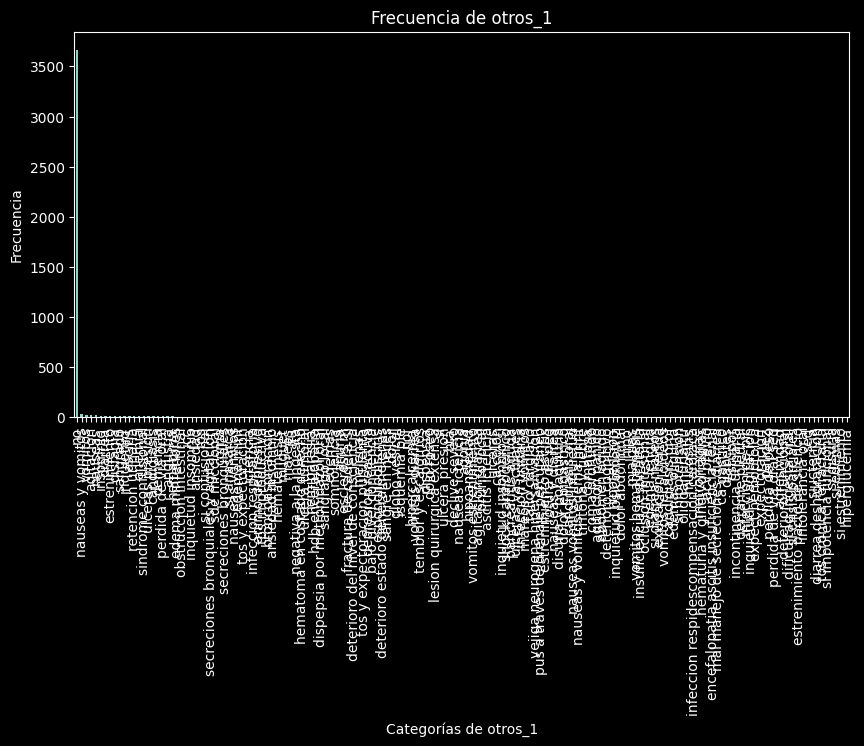

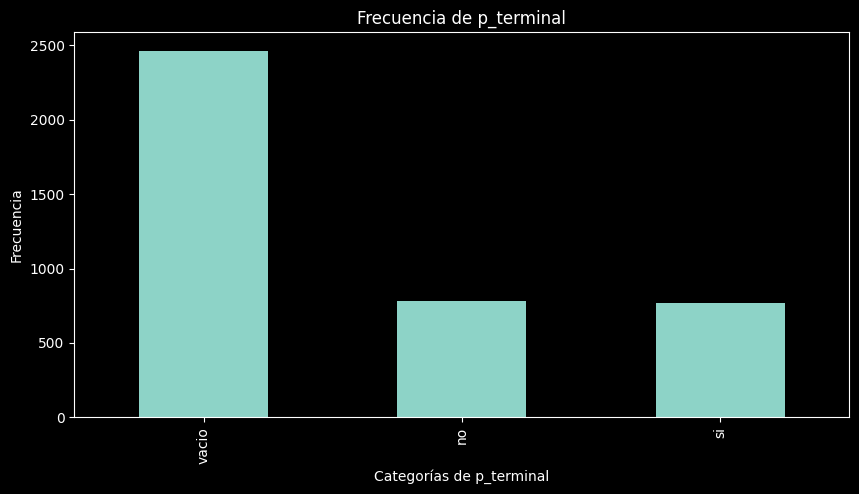

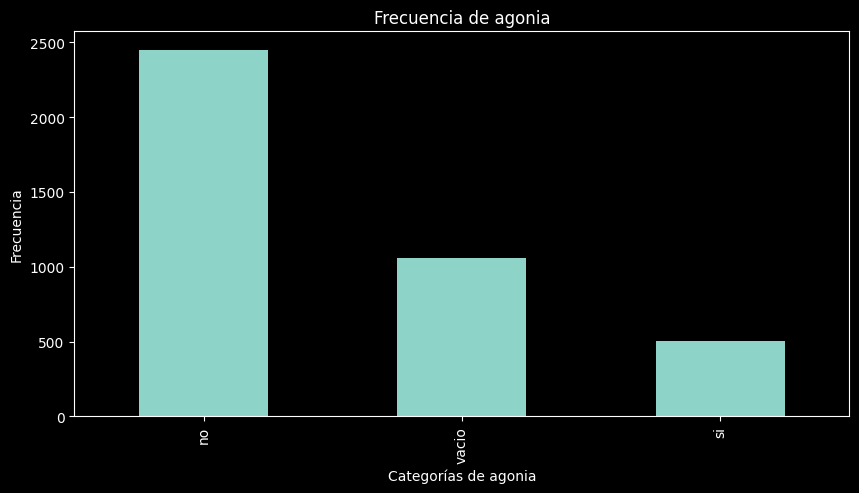

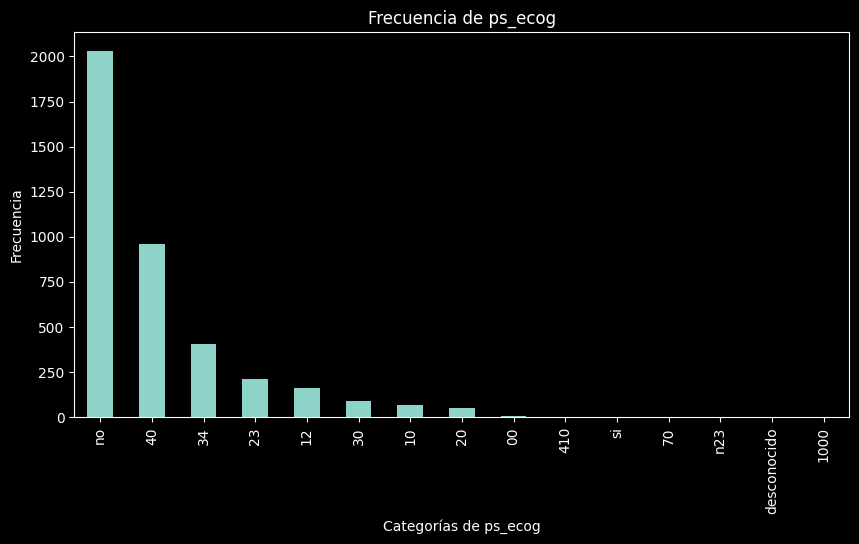

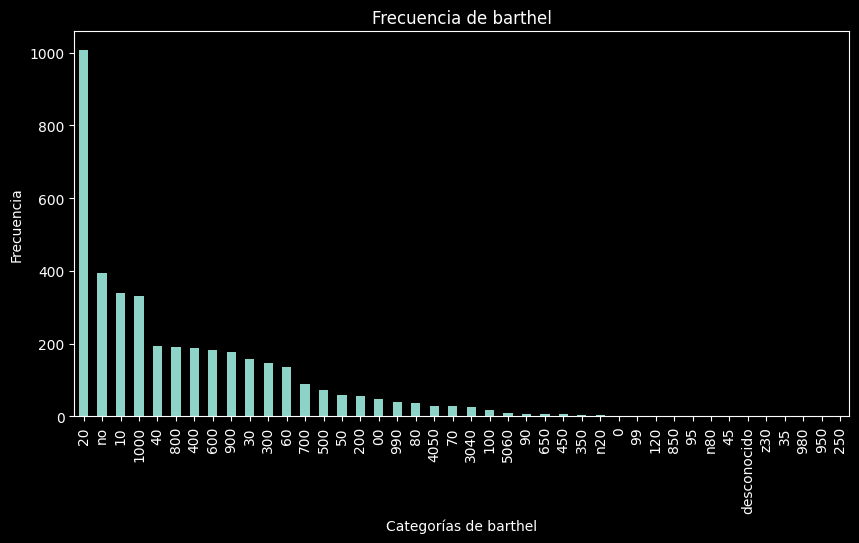

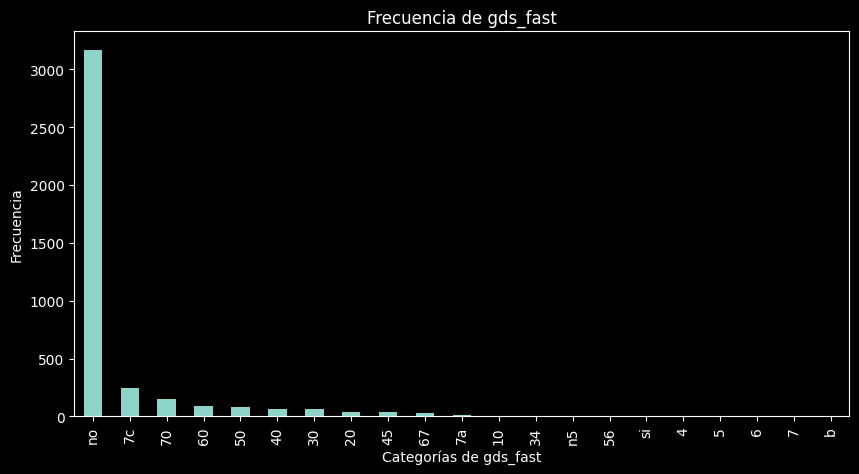

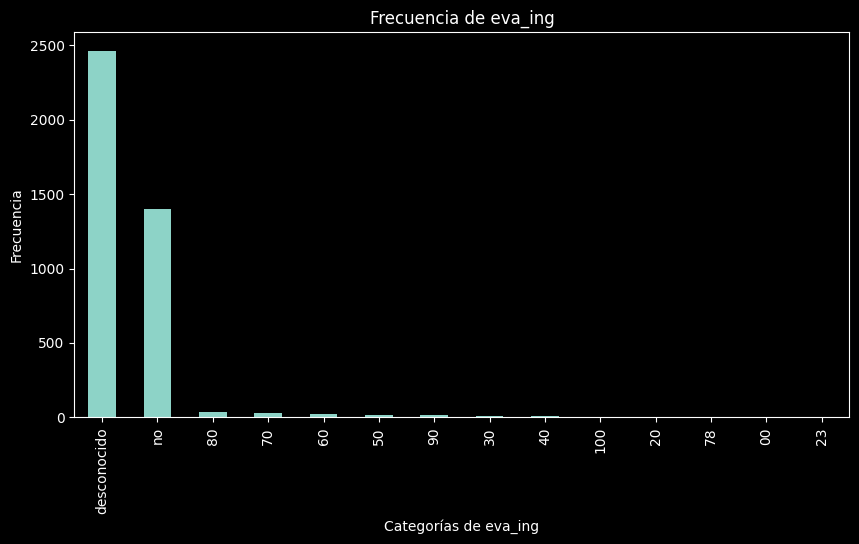

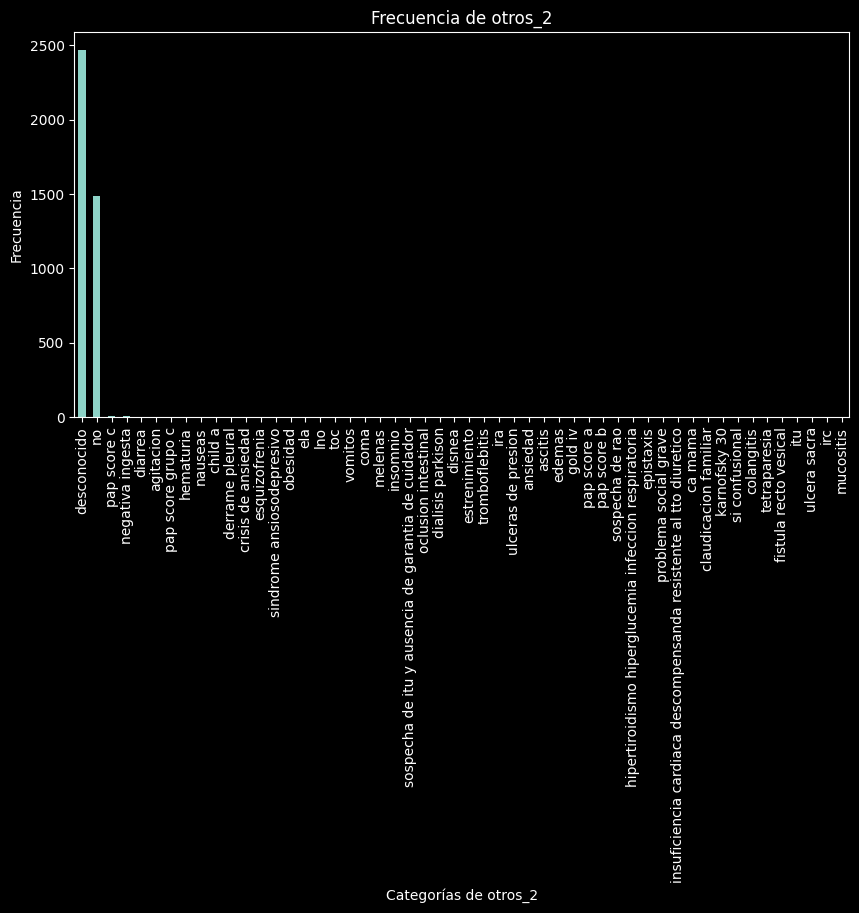

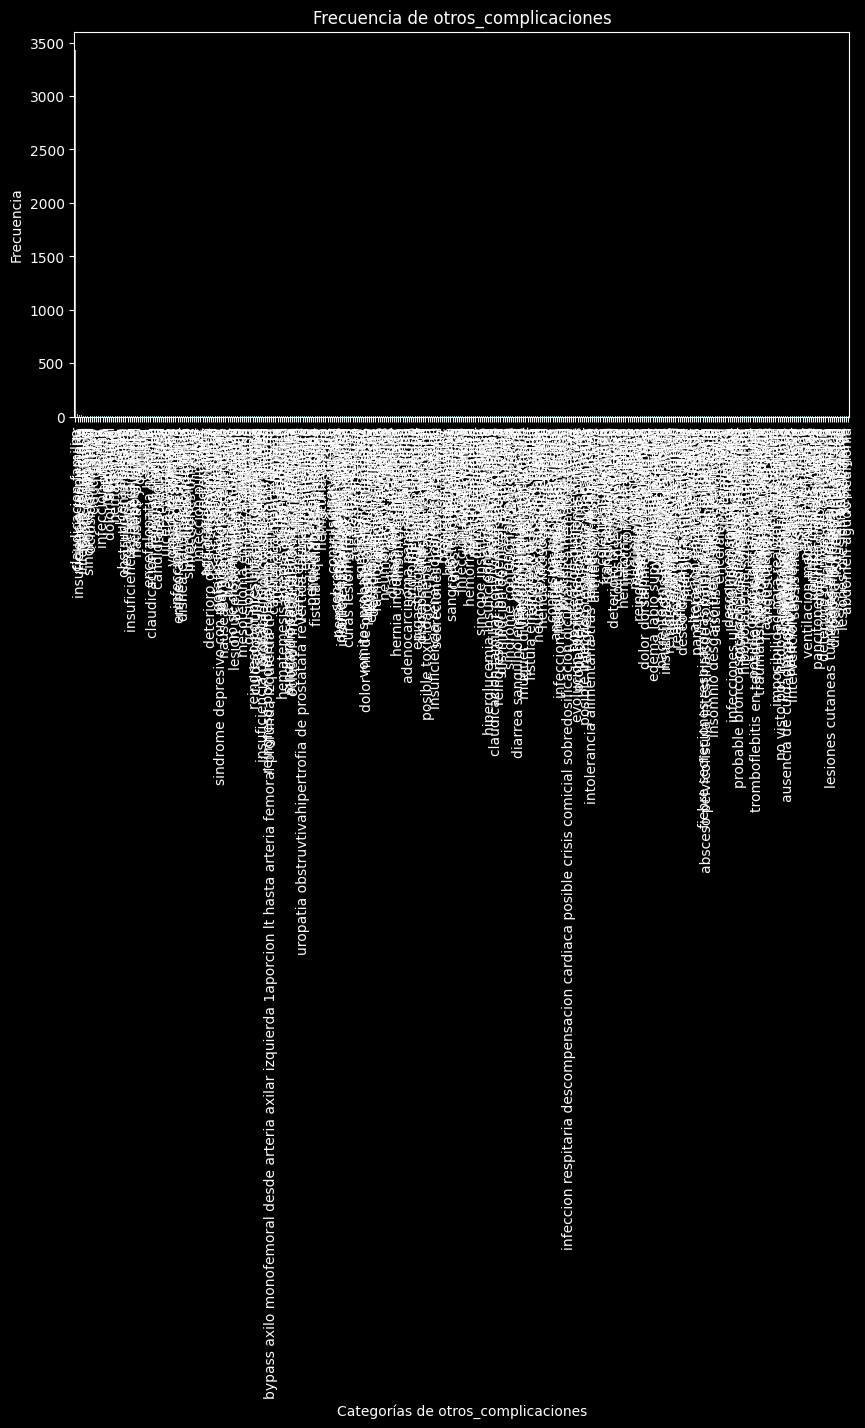

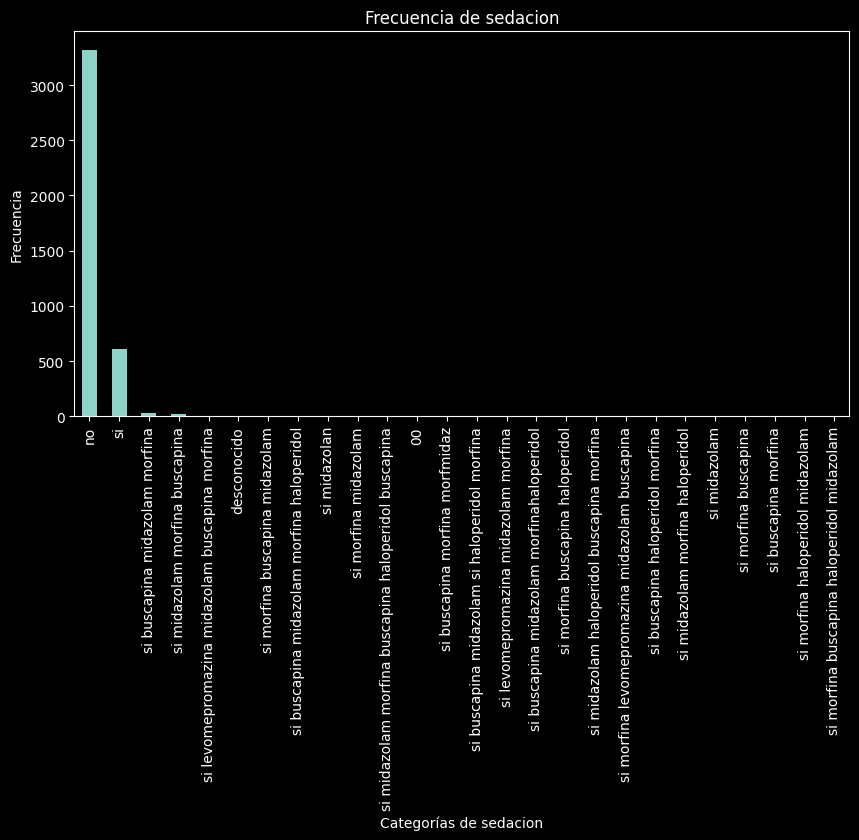

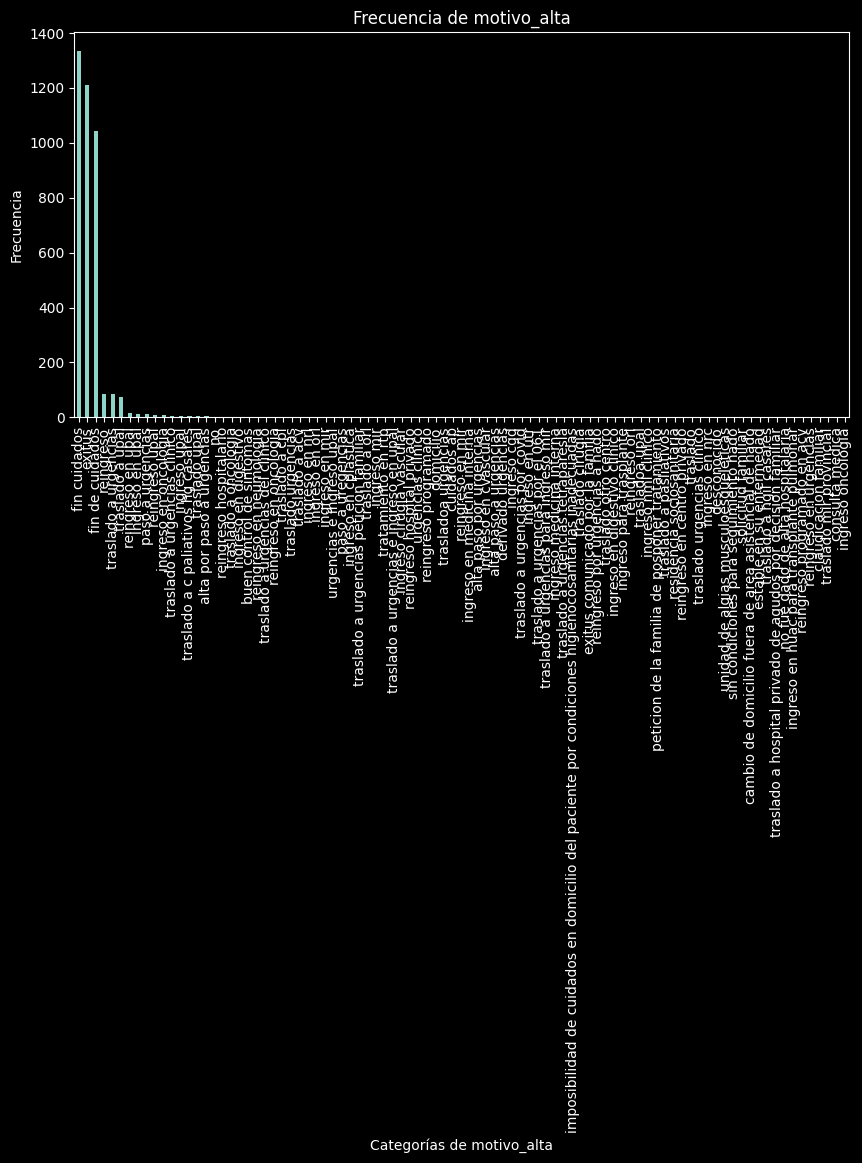

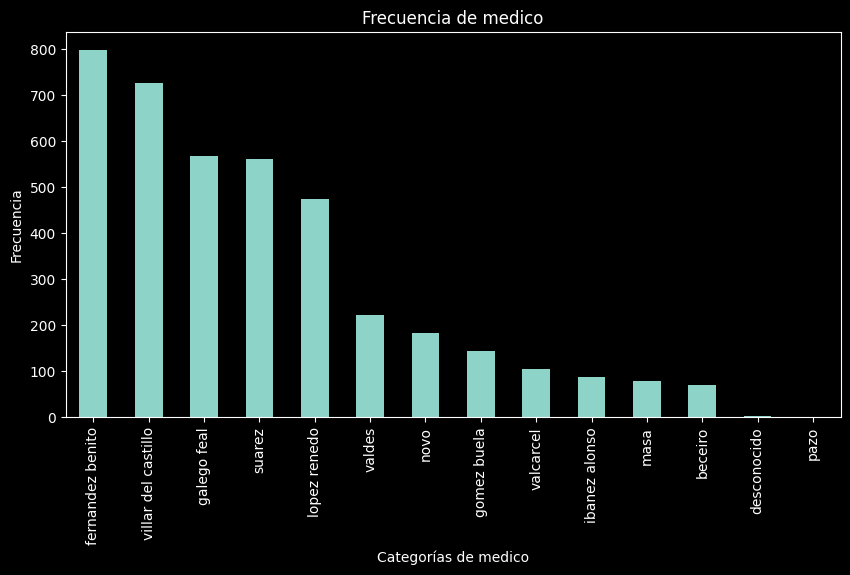

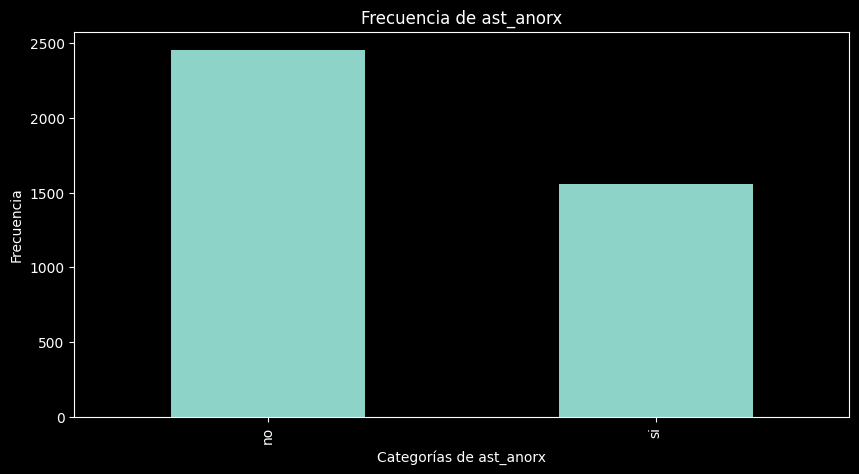

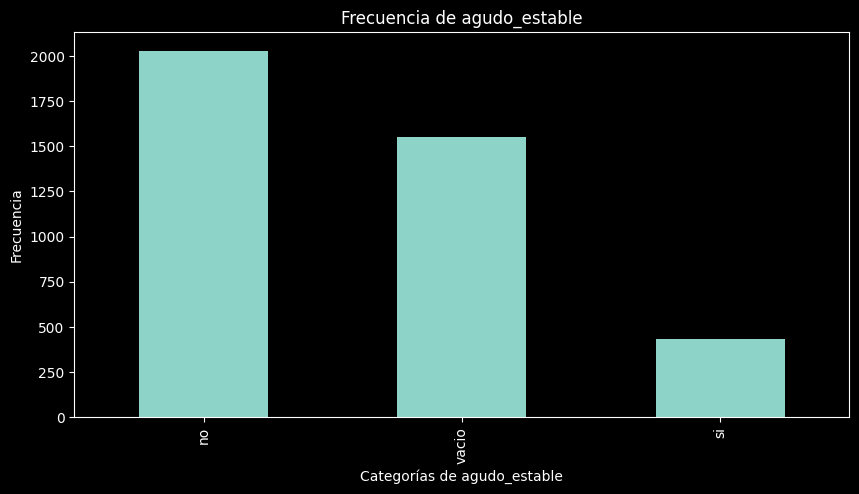

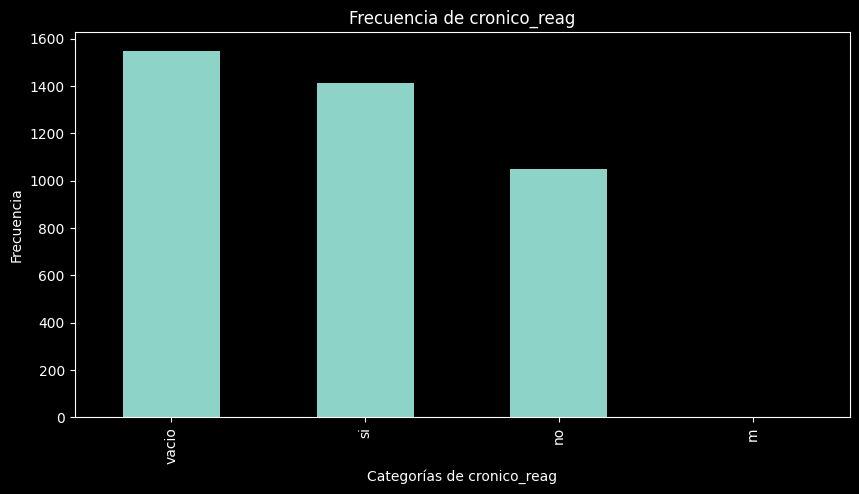

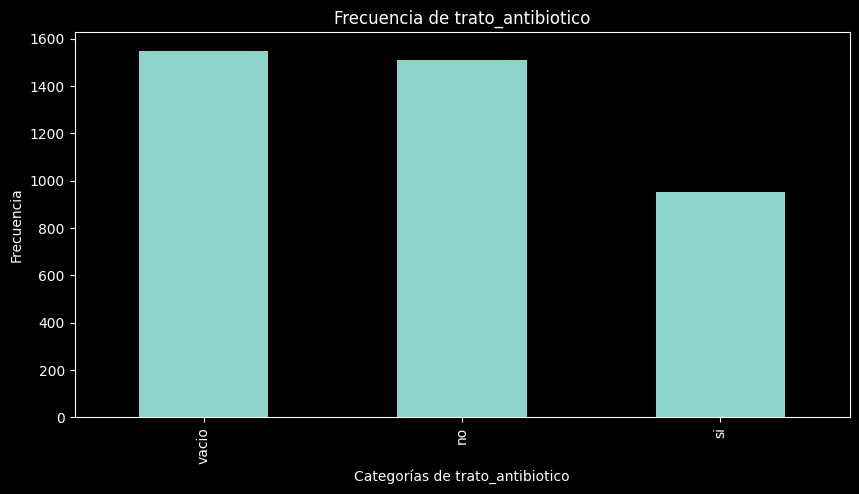

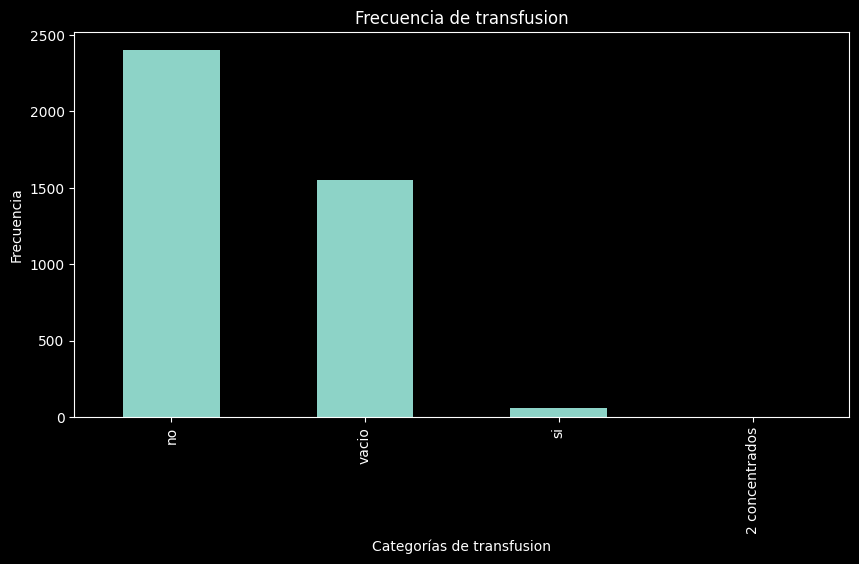

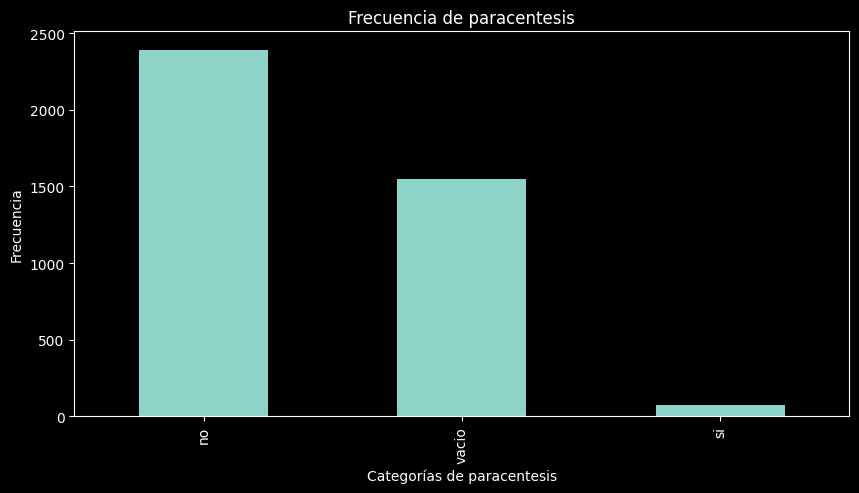

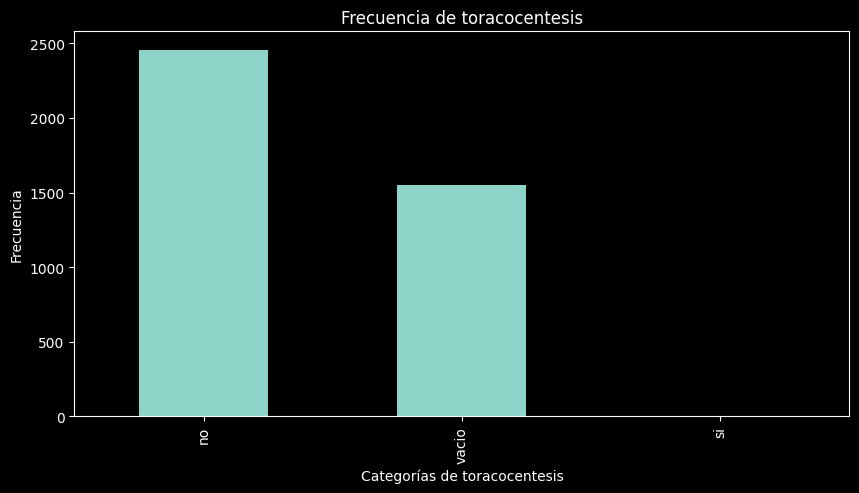

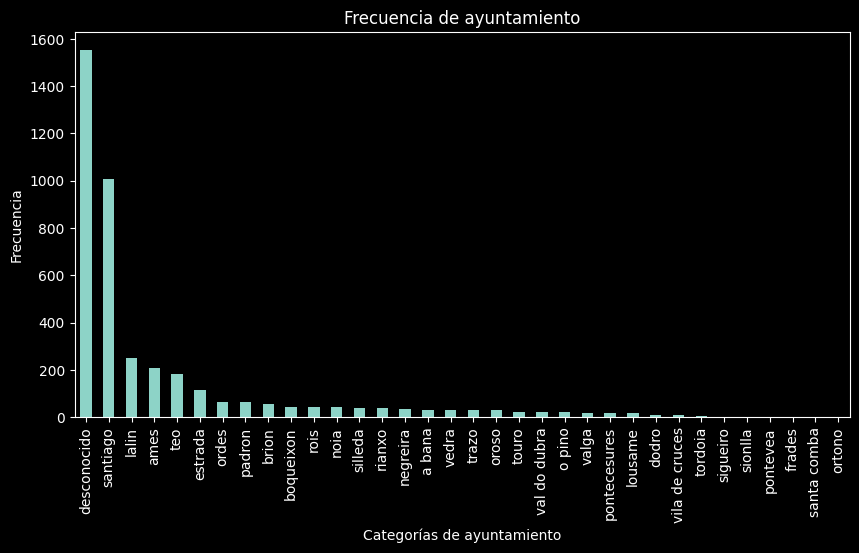

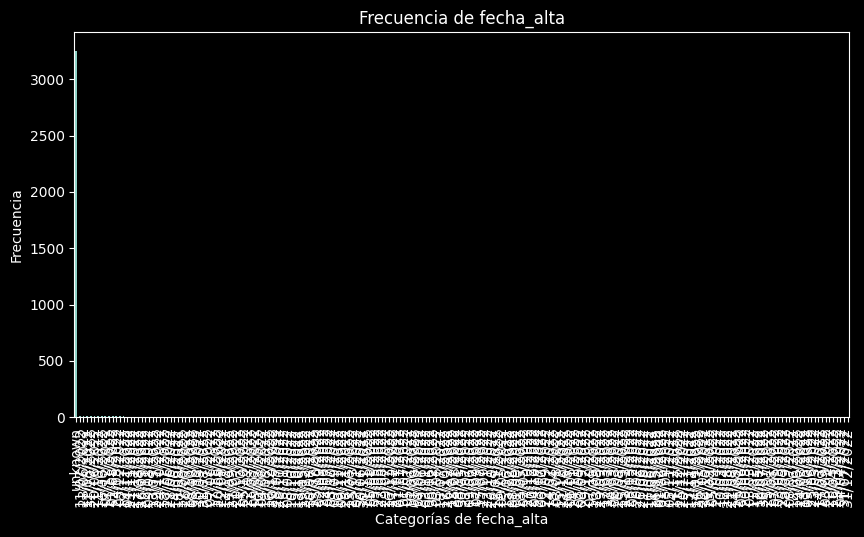

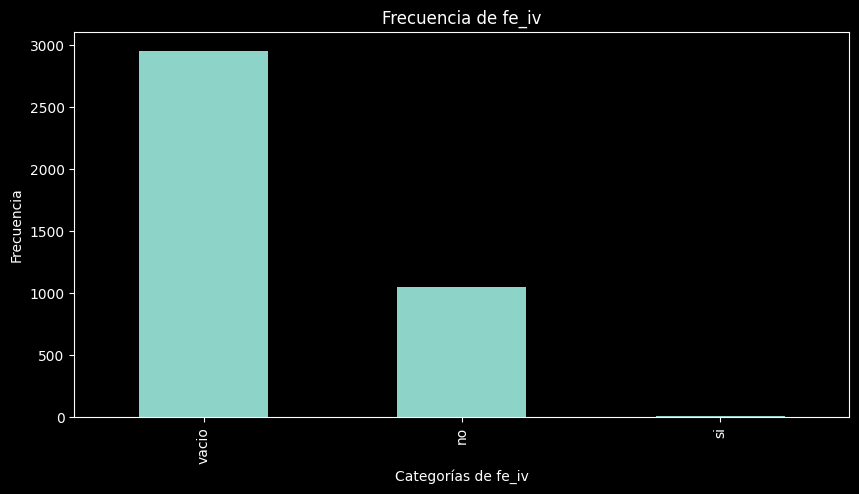

In [90]:
# Lista de columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear un gráfico de barras para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 5))  # Tamaño de la figura
    df[col].value_counts().plot(kind='bar')
    plt.title('Frecuencia de {}'.format(col))
    plt.xlabel('Categorías de {}'.format(col))
    plt.ylabel('Frecuencia')
    plt.show()


## 1.2 Porcentaje de cada categoría

In [10]:
[(col,df[col].value_counts(normalize=True)) for col in df]

[('h_procedencia',
  clinico                 0.558186
  no                      0.311737
  conxo                   0.081984
  gil casares             0.039123
  provincial              0.002990
  chuac                   0.001495
  residencia              0.001246
  si                      0.000748
  rosaleda                0.000748
  hula                    0.000249
  salnes                  0.000249
  ap                      0.000249
  san rafael la coruna    0.000249
  quiron la coruna        0.000249
  lucus augusti           0.000249
  pontevedra              0.000249
  Name: h_procedencia, dtype: float64),
 ('s_procedencia',
  no                              0.305258
  oncologia                       0.134064
  mir                             0.120359
  urgencias                       0.103414
  upal                            0.051832
                                    ...   
  consultas externas oncologia    0.000249
  mir gil                         0.000249
  enfermedad infec

## 1.3 Filtrar por frecuencias:

In [14]:
# for col in df:
#     value_counts = df[col].value_counts()
#     to_remove = value_counts[value_counts <= 5].index
#     df[col].replace(to_remove, np.nan, inplace=True)

## 1.4 Análisis de frecuencia en relación con la variable objetivo:

In [91]:
pd.crosstab(df['h_procedencia'], df['ap'])

ap                    ap  consulta externa    no  pac  residencia    si  uro  \
h_procedencia                                                                  
ap                     0                 0     0    0           0     1    0   
chuac                  0                 0     6    0           0     0    0   
clinico                0                 1  2209    1           0    28    1   
conxo                  0                 0   327    0           0     2    0   
gil casares            0                 0   156    0           0     0    0   
hula                   0                 0     1    0           0     0    0   
lucus augusti          0                 0     1    0           0     0    0   
no                     5                 0    42    0           2  1202    0   
pontevedra             0                 0     1    0           0     0    0   
provincial             0                 0    12    0           0     0    0   
quiron la coruna       0                 0     0    0           0     1    0   
residencia             0                 0     5    0           0     0    0   
rosaleda               0                 0     3    0           0     0    0   
salnes                 0                 0     1    0           0     0    0   
san rafael la coruna   0                 0     0    0           0     1    0   
si                     0                 0     3    0           0     0    0   

ap                    vacio  
h_procedencia                
ap                        0  
chuac                     0  
clinico                   0  
conxo                     0  
gil casares               1  
hula                      0  
lucus augusti             0  
no                        0  
pontevedra                0  
provincial                0  
quiron la coruna          0  
residencia                0  
rosaleda                  0  
salnes                    0  
san rafael la coruna      0  
si                        0

In [92]:
for col in df:
    if col != 'diagnostico':
        print(pd.crosstab(df[col], df['diagnostico']))
    else:
        print("You can't crosstab column diagnostico with diagnostico")

diagnostico           ITU (infeccion del tracto urinario)  \
h_procedencia                                               
ap                                                      0   
chuac                                                   1   
clinico                                                98   
conxo                                                  14   
gil casares                                             8   
hula                                                    0   
lucus augusti                                           0   
no                                                     51   
pontevedra                                              0   
provincial                                              0   
quiron la coruna                                        0   
residencia                                              0   
rosaleda                                                0   
salnes                                                  0   
san rafael la coruna    

# 2.Correlation Analysis
Aunque la correlación generalmente se mide entre variables numéricas, también puedes medir la correlación entre variables categóricas utilizando el coeficiente de correlación de Cramér.

In [93]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df['h_procedencia'], df['s_procedencia'])


0.42913307515494187

In [94]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_columns = df.select_dtypes(include=['object']).columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])


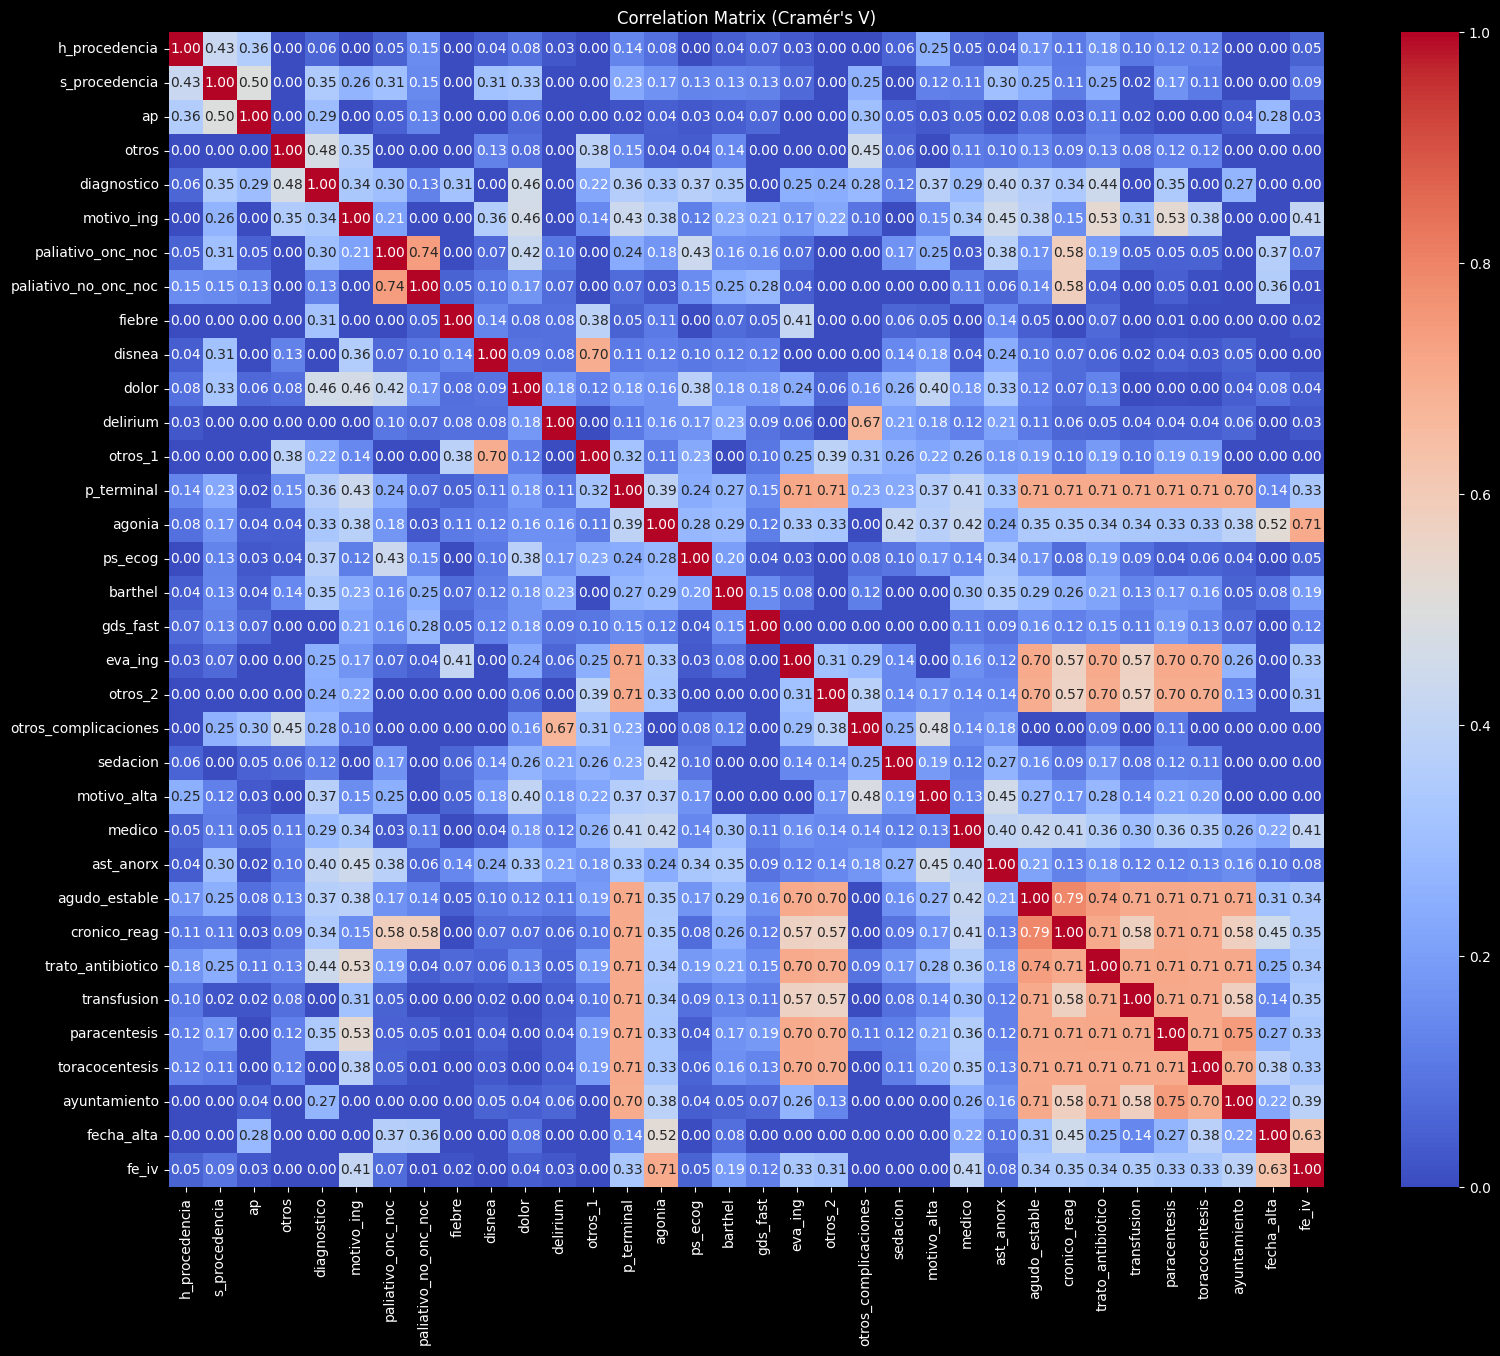

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Cramér\'s V)')
plt.show()

# 3.Codificación One-hot
Este es un proceso mediante el cual las variables categóricas se convierten en una forma que podría ser proporcionada a los algoritmos de machine learning para hacer un mejor trabajo en la predicción. Por ejemplo:
```python
df_dummies = pd.get_dummies(df, columns=['h_procedencia', 's_procedencia'])
```

# 4.Feature Hashing

Esta es una técnica inteligente para codificar categorías en un número limitado de dimensiones. Cuando la cardinalidad (número de valores únicos) es muy alta, one-hot encoding puede aumentar la dimensionalidad demasiado y puede causar problemas de memoria. El hashing trick proporciona una solución a este problema.

In [18]:
from sklearn.feature_extraction import FeatureHasher

# Número de características que quieres después de la transformación
n_features = 10

# Crear el hasher
hasher = FeatureHasher(n_features=n_features, input_type='string')

# Aplicar la transformación a las columnas deseadas
hashed_features = hasher.transform(df['diagnostico'].str.split().values)

# Convertir a DataFrame
hashed_features = pd.DataFrame(hashed_features.toarray())

hashed_features

0    1    2    3    4    5    6    7    8    9
0     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
1     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0
2     0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0 -2.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
4008  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.0  0.0  2.0
4009  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
4010  0.0  0.0  0.0 -1.0  0.0  0.0 -1.0  0.0  0.0  0.0
4011  0.0  0.0 -1.0  0.0  0.0  0.0  1.0  0.0 -1.0  0.0
4012  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

[4013 rows x 10 columns]

In [19]:
df_hashed = df.copy()

df_hashed = df_hashed.drop(columns=['diagnostico'])

df_hashed = pd.concat([df_hashed, hashed_features], axis=1)

df_hashed.head()

h_procedencia s_procedencia  ap                             otros  \
0   gil casares          upal  no   reingreso en urgencias no no no   
1       clinico     oncologia  no  met pulmonares y digest no no no   
2       clinico           mir  no                       no no no no   
3       clinico     digestivo  no                       no no no no   
4       clinico     urgencias  no                       no no no no   

                  motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0           control sintomas                si                   si     no   
1          mal control dolor                si                   no     no   
2          control evolutivo                si                   si     no   
3  administracion octreotido                no                   no     no   
4           control sintomas                si                   no     no   

  disnea dolor  ...    0    1    2    3    4    5    6    7    8    9  
0     no    si  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1     no    si  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  
2     si    no  ...  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3     no    no  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  
4     si    si  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0 -2.0  1.0  1.0  

[5 rows x 43 columns]

# 5.Encoding Categorical Data

* We can not load our Machine Learning Model with Categorical Data because ML Models can not understand String Data
  
* We must use technique to encode the Categorical Columns. there are many Techniques : LabelEncoding, One-hot-Encoding, TargetMeanEncoding and many more.
  
* We will Encode the Categorical Columns on the Basis of the Frequency distribution (Cardinality)
* We Use One-hot-Encoding for low Cardinality Columns and will use LabelEncoding for High Cardinality Columns.
* One-hot-Encoding: it is a type of encoding in which we create new columns with the values of that categorical column and assign 1 for yes and 0 for no. Like Column Side have two values S and P. it will create two columns S and P and then assign 1 and 0 in S and also Same for P.
* LabelEncoding: it is used when we have high cardinality column because if we have column which have 2000 different unique values in string, then we can not use one-hot-encoding beacause it will create 2000 columns which will be harder for us. so, we use LabelEncoding which encode on that column in which we are working on. it will assign numbers to every unique string in that particular column.

In [ ]:
le = LabelEncoder()

print(pd.get_dummies(cat_data['']))
print(le.fit_transform(cat_data['']))
